# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 8978 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)


  0% (   0 of 8978) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   8 of 8978) |                       | Elapsed Time: 0:00:25 ETA: 7:54:21

  0% (  24 of 8978) |                       | Elapsed Time: 0:00:25 ETA: 2:39:07

  0% (  40 of 8978) |                       | Elapsed Time: 0:00:25 ETA: 1:36:05

  0% (  56 of 8978) |                       | Elapsed Time: 0:00:26 ETA: 1:09:03

  0% (  72 of 8978) |                       | Elapsed Time: 0:00:26 ETA: 0:01:57

  0% (  88 of 8978) |                       | Elapsed Time: 0:00:26 ETA: 0:01:54

  1% ( 104 of 8978) |                       | Elapsed Time: 0:00:26 ETA: 0:01:54

  1% ( 121 of 8978) |                       | Elapsed Time: 0:00:26 ETA: 0:01:53

  1% ( 137 of 8978) |                       | Elapsed Time: 0:00:27 ETA: 0:01:54

  1% ( 154 of 8978) |                       | Elapsed Time: 0:00:27 ETA: 0:01:53

  1% ( 170 of 8978) |                       | Elapsed Time: 0:00:27 ETA: 0:01:53

  2% ( 186 of 8978) |                       | Elapsed Time: 0:00:27 ETA: 0:01:52

  2% ( 202 of 8978) |                       | Elapsed Time: 0:00:27 ETA: 0:01:52

  2% ( 225 of 8978) |                       | Elapsed Time: 0:00:28 ETA: 0:01:51

  2% ( 242 of 8978) |                       | Elapsed Time: 0:00:28 ETA: 0:01:50

  2% ( 259 of 8978) |                       | Elapsed Time: 0:00:28 ETA: 0:01:49

  3% ( 275 of 8978) |                       | Elapsed Time: 0:00:28 ETA: 0:01:48

  3% ( 292 of 8978) |                       | Elapsed Time: 0:00:29 ETA: 0:01:48

  3% ( 307 of 8978) |                       | Elapsed Time: 0:00:29 ETA: 0:01:49

  3% ( 323 of 8978) |                       | Elapsed Time: 0:00:29 ETA: 0:01:52

  3% ( 337 of 8978) |                       | Elapsed Time: 0:00:29 ETA: 0:01:52

  3% ( 354 of 8978) |                       | Elapsed Time: 0:00:29 ETA: 0:01:54

  4% ( 371 of 8978) |                       | Elapsed Time: 0:00:30 ETA: 0:01:56

  4% ( 388 of 8978) |                       | Elapsed Time: 0:00:30 ETA: 0:01:53

  4% ( 406 of 8978) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:51

  4% ( 424 of 8978) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:45

  5% ( 449 of 8978) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:42

  5% ( 467 of 8978) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:40

  5% ( 485 of 8978) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:39

  5% ( 503 of 8978) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:39

  5% ( 521 of 8978) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:39

  6% ( 539 of 8978) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:39

  6% ( 562 of 8978) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:39

  6% ( 580 of 8978) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:38

  6% ( 595 of 8978) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:42

  6% ( 612 of 8978) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:44

  6% ( 627 of 8978) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:48

  7% ( 641 of 8978) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:54

  7% ( 656 of 8978) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:57

  7% ( 674 of 8978) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:55

  7% ( 691 of 8978) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:54

  7% ( 708 of 8978) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:52

  8% ( 723 of 8978) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:51

  8% ( 739 of 8978) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:52

  8% ( 755 of 8978) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:49

  8% ( 771 of 8978) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:49

  8% ( 786 of 8978) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:51

  8% ( 802 of 8978) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:50

  9% ( 818 of 8978) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:50

  9% ( 834 of 8978) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:50

  9% ( 850 of 8978) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:50

  9% ( 866 of 8978) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:46

  9% ( 882 of 8978) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:46

 10% ( 905 of 8978) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:47

 10% ( 919 of 8978) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:49

 10% ( 934 of 8978) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:50

 10% ( 950 of 8978) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:50

 10% ( 966 of 8978) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:51

 10% ( 983 of 8978) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:47

 11% (1001 of 8978) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:43

 11% (1020 of 8978) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:40

 11% (1038 of 8978) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:37

 11% (1056 of 8978) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:35

 11% (1073 of 8978) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:36

 12% (1088 of 8978) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:39

 12% (1105 of 8978) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:40

 12% (1123 of 8978) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:40

 12% (1139 of 8978) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:42

 12% (1153 of 8978) |##                     | Elapsed Time: 0:00:40 ETA: 0:01:43

 13% (1168 of 8978) |##                     | Elapsed Time: 0:00:40 ETA: 0:01:46

 13% (1184 of 8978) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:46

 13% (1200 of 8978) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:49

 13% (1217 of 8978) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:45

 13% (1235 of 8978) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:41

 13% (1253 of 8978) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:38

 14% (1271 of 8978) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:35

 14% (1287 of 8978) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:34

 14% (1303 of 8978) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:33

 14% (1318 of 8978) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:37

 14% (1333 of 8978) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:41

 15% (1355 of 8978) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:43

 15% (1371 of 8978) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:43

 15% (1387 of 8978) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:43

 15% (1403 of 8978) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:41

 15% (1415 of 8978) |###                    | Elapsed Time: 0:00:44 ETA: 0:03:00

 15% (1431 of 8978) |###                    | Elapsed Time: 0:00:44 ETA: 0:03:07

 16% (1447 of 8978) |###                    | Elapsed Time: 0:00:44 ETA: 0:03:07

 16% (1467 of 8978) |###                    | Elapsed Time: 0:00:45 ETA: 0:03:02

 16% (1483 of 8978) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:39

 16% (1499 of 8978) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:39

 16% (1515 of 8978) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:38

 17% (1531 of 8978) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:38

 17% (1547 of 8978) |###                    | Elapsed Time: 0:00:46 ETA: 0:01:37

 17% (1563 of 8978) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:37

 17% (1580 of 8978) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:37

 17% (1596 of 8978) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:37

 17% (1612 of 8978) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:37

 18% (1628 of 8978) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:37

 18% (1644 of 8978) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:37

 18% (1660 of 8978) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:36

 18% (1676 of 8978) |####                   | Elapsed Time: 0:00:47 ETA: 0:01:36

 18% (1692 of 8978) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:35

 19% (1708 of 8978) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:34

 19% (1724 of 8978) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:35

 19% (1741 of 8978) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:34

 19% (1758 of 8978) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:33

 19% (1774 of 8978) |####                   | Elapsed Time: 0:00:49 ETA: 0:01:34

 20% (1796 of 8978) |####                   | Elapsed Time: 0:00:49 ETA: 0:01:34

 20% (1812 of 8978) |####                   | Elapsed Time: 0:00:49 ETA: 0:01:34

 20% (1827 of 8978) |####                   | Elapsed Time: 0:00:49 ETA: 0:01:38

 20% (1841 of 8978) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:39

 20% (1856 of 8978) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:40

 20% (1871 of 8978) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:41

 21% (1889 of 8978) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:37

 21% (1908 of 8978) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:36

 21% (1923 of 8978) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:35

 21% (1939 of 8978) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:32

 21% (1954 of 8978) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:35

 21% (1970 of 8978) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:36

 22% (1988 of 8978) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:32

 22% (2004 of 8978) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:31

 22% (2021 of 8978) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:29

 22% (2039 of 8978) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:27

 22% (2057 of 8978) |#####                  | Elapsed Time: 0:00:52 ETA: 0:01:26

 23% (2075 of 8978) |#####                  | Elapsed Time: 0:00:53 ETA: 0:01:26

 23% (2093 of 8978) |#####                  | Elapsed Time: 0:00:53 ETA: 0:01:23

 23% (2111 of 8978) |#####                  | Elapsed Time: 0:00:53 ETA: 0:01:22

 23% (2133 of 8978) |#####                  | Elapsed Time: 0:00:53 ETA: 0:01:20

 23% (2151 of 8978) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:20

 24% (2169 of 8978) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:20

 24% (2187 of 8978) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:20

 24% (2205 of 8978) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:20

 24% (2222 of 8978) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:21

 25% (2245 of 8978) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:21

 25% (2262 of 8978) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:21

 25% (2280 of 8978) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:20

 25% (2297 of 8978) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:20

 25% (2314 of 8978) |#####                  | Elapsed Time: 0:00:56 ETA: 0:01:21

 25% (2329 of 8978) |#####                  | Elapsed Time: 0:00:56 ETA: 0:01:24

 26% (2344 of 8978) |######                 | Elapsed Time: 0:00:56 ETA: 0:01:27

 26% (2366 of 8978) |######                 | Elapsed Time: 0:00:56 ETA: 0:01:28

 26% (2382 of 8978) |######                 | Elapsed Time: 0:00:56 ETA: 0:01:28

 26% (2398 of 8978) |######                 | Elapsed Time: 0:00:57 ETA: 0:01:28

 26% (2414 of 8978) |######                 | Elapsed Time: 0:00:57 ETA: 0:01:26

 27% (2430 of 8978) |######                 | Elapsed Time: 0:00:57 ETA: 0:01:22

 27% (2446 of 8978) |######                 | Elapsed Time: 0:00:57 ETA: 0:01:22

 27% (2469 of 8978) |######                 | Elapsed Time: 0:00:58 ETA: 0:01:22

 27% (2485 of 8978) |######                 | Elapsed Time: 0:00:58 ETA: 0:01:22

 27% (2502 of 8978) |######                 | Elapsed Time: 0:00:58 ETA: 0:01:21

 28% (2518 of 8978) |######                 | Elapsed Time: 0:00:58 ETA: 0:01:21

 28% (2534 of 8978) |######                 | Elapsed Time: 0:00:58 ETA: 0:01:21

 28% (2549 of 8978) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:24

 28% (2565 of 8978) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:25

 28% (2582 of 8978) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:27

 28% (2596 of 8978) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:30

 29% (2614 of 8978) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:27

 29% (2631 of 8978) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:24

 29% (2648 of 8978) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:22

 29% (2664 of 8978) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:21

 29% (2682 of 8978) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:18

 30% (2702 of 8978) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:19

 30% (2719 of 8978) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:19

 30% (2733 of 8978) |#######                | Elapsed Time: 0:01:01 ETA: 0:01:22

 30% (2747 of 8978) |#######                | Elapsed Time: 0:01:01 ETA: 0:01:23

 30% (2762 of 8978) |#######                | Elapsed Time: 0:01:01 ETA: 0:01:28

 30% (2780 of 8978) |#######                | Elapsed Time: 0:01:02 ETA: 0:01:27

 31% (2796 of 8978) |#######                | Elapsed Time: 0:01:02 ETA: 0:01:26

 31% (2814 of 8978) |#######                | Elapsed Time: 0:01:02 ETA: 0:01:24

 31% (2830 of 8978) |#######                | Elapsed Time: 0:01:02 ETA: 0:01:22

 31% (2848 of 8978) |#######                | Elapsed Time: 0:01:03 ETA: 0:01:18

 31% (2864 of 8978) |#######                | Elapsed Time: 0:01:03 ETA: 0:01:18

 32% (2880 of 8978) |#######                | Elapsed Time: 0:01:03 ETA: 0:01:17

 32% (2896 of 8978) |#######                | Elapsed Time: 0:01:03 ETA: 0:01:17

 32% (2918 of 8978) |#######                | Elapsed Time: 0:01:03 ETA: 0:01:18

 32% (2936 of 8978) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:16

 32% (2953 of 8978) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:14

 33% (2970 of 8978) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:14

 33% (2988 of 8978) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:13

 33% (3005 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:13

 33% (3022 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:13

 33% (3040 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:13

 34% (3056 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:14

 34% (3074 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:12

 34% (3091 of 8978) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:12

 34% (3108 of 8978) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:12

 34% (3126 of 8978) |########               | Elapsed Time: 0:01:06 ETA: 0:01:10

 35% (3143 of 8978) |########               | Elapsed Time: 0:01:06 ETA: 0:01:09

 35% (3162 of 8978) |########               | Elapsed Time: 0:01:06 ETA: 0:01:09

 35% (3182 of 8978) |########               | Elapsed Time: 0:01:07 ETA: 0:01:07

 35% (3201 of 8978) |########               | Elapsed Time: 0:01:07 ETA: 0:01:06

 35% (3219 of 8978) |########               | Elapsed Time: 0:01:07 ETA: 0:01:05

 36% (3237 of 8978) |########               | Elapsed Time: 0:01:07 ETA: 0:01:04

 36% (3255 of 8978) |########               | Elapsed Time: 0:01:07 ETA: 0:01:04

 36% (3272 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:01:06

 36% (3290 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:01:07

 36% (3307 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:01:07

 37% (3324 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:01:09

 37% (3342 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:01:08

 37% (3357 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:01:10

 37% (3376 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:01:11

 37% (3392 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:01:11

 37% (3406 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:01:14

 38% (3422 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:01:16

 38% (3439 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:01:14

 38% (3456 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:01:13

 38% (3479 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:01:12

 38% (3497 of 8978) |########               | Elapsed Time: 0:01:11 ETA: 0:01:08

 39% (3515 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:01:06

 39% (3533 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:01:06

 39% (3551 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:01:04

 39% (3569 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:01:03

 40% (3592 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:01:03

 40% (3608 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:01:05

 40% (3623 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:01:08

 40% (3639 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:01:11

 40% (3655 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:01:13

 40% (3672 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:01:13

 41% (3688 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:01:11

 41% (3713 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:01:07

 41% (3727 of 8978) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:06

 41% (3742 of 8978) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:08

 41% (3757 of 8978) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:09

 42% (3775 of 8978) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:08

 42% (3793 of 8978) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:07

 42% (3816 of 8978) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:04

 42% (3832 of 8978) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:03

 42% (3849 of 8978) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:03

 43% (3866 of 8978) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:04

 43% (3884 of 8978) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:03

 43% (3903 of 8978) |#########              | Elapsed Time: 0:01:16 ETA: 0:01:01

 43% (3928 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:01:00

 43% (3944 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:01:01

 44% (3961 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:01:00

 44% (3978 of 8978) |##########             | Elapsed Time: 0:01:17 ETA: 0:01:01

 44% (3994 of 8978) |##########             | Elapsed Time: 0:01:17 ETA: 0:01:04

 44% (4011 of 8978) |##########             | Elapsed Time: 0:01:17 ETA: 0:01:03

 44% (4029 of 8978) |##########             | Elapsed Time: 0:01:17 ETA: 0:01:02

 45% (4050 of 8978) |##########             | Elapsed Time: 0:01:18 ETA: 0:01:01

 45% (4066 of 8978) |##########             | Elapsed Time: 0:01:18 ETA: 0:01:00

 45% (4083 of 8978) |##########             | Elapsed Time: 0:01:18 ETA: 0:01:00

 45% (4101 of 8978) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:59

 45% (4119 of 8978) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:59

 46% (4136 of 8978) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:59

 46% (4153 of 8978) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:58

 46% (4169 of 8978) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:59

 46% (4183 of 8978) |##########             | Elapsed Time: 0:01:19 ETA: 0:01:02

 46% (4200 of 8978) |##########             | Elapsed Time: 0:01:19 ETA: 0:01:03

 46% (4215 of 8978) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:04

 47% (4230 of 8978) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:07

 47% (4245 of 8978) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:05

 47% (4265 of 8978) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:02

 47% (4283 of 8978) |##########             | Elapsed Time: 0:01:21 ETA: 0:01:00

 47% (4301 of 8978) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:59

 48% (4318 of 8978) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:57

 48% (4336 of 8978) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:55

 48% (4354 of 8978) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:54

 48% (4377 of 8978) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:54

 48% (4396 of 8978) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:53

 49% (4413 of 8978) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:53

 49% (4430 of 8978) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:54

 49% (4448 of 8978) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:53

 49% (4465 of 8978) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:54

 49% (4481 of 8978) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:55

 50% (4498 of 8978) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:55

 50% (4515 of 8978) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:56

 50% (4533 of 8978) |###########            | Elapsed Time: 0:01:24 ETA: 0:00:56

 50% (4542 of 8978) |###########            | Elapsed Time: 0:01:24 ETA: 0:00:55

 50% (4553 of 8978) |###########            | Elapsed Time: 0:01:25 ETA: 0:01:55

 50% (4569 of 8978) |###########            | Elapsed Time: 0:01:25 ETA: 0:01:56

 51% (4585 of 8978) |###########            | Elapsed Time: 0:01:25 ETA: 0:01:57

 51% (4602 of 8978) |###########            | Elapsed Time: 0:01:25 ETA: 0:02:00

 51% (4618 of 8978) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:56

 51% (4634 of 8978) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:56

 51% (4650 of 8978) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:56

 51% (4667 of 8978) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:55

 52% (4685 of 8978) |############           | Elapsed Time: 0:01:27 ETA: 0:00:54

 52% (4702 of 8978) |############           | Elapsed Time: 0:01:27 ETA: 0:00:53

 52% (4722 of 8978) |############           | Elapsed Time: 0:01:27 ETA: 0:00:53

 52% (4740 of 8978) |############           | Elapsed Time: 0:01:27 ETA: 0:00:52

 52% (4758 of 8978) |############           | Elapsed Time: 0:01:27 ETA: 0:00:51

 53% (4775 of 8978) |############           | Elapsed Time: 0:01:28 ETA: 0:00:51

 53% (4791 of 8978) |############           | Elapsed Time: 0:01:28 ETA: 0:00:51

 53% (4809 of 8978) |############           | Elapsed Time: 0:01:28 ETA: 0:00:50

 53% (4826 of 8978) |############           | Elapsed Time: 0:01:28 ETA: 0:00:50

 53% (4843 of 8978) |############           | Elapsed Time: 0:01:28 ETA: 0:00:50

 54% (4861 of 8978) |############           | Elapsed Time: 0:01:29 ETA: 0:00:49

 54% (4876 of 8978) |############           | Elapsed Time: 0:01:29 ETA: 0:00:51

 54% (4892 of 8978) |############           | Elapsed Time: 0:01:29 ETA: 0:00:52

 54% (4908 of 8978) |############           | Elapsed Time: 0:01:29 ETA: 0:00:52

 54% (4924 of 8978) |############           | Elapsed Time: 0:01:30 ETA: 0:00:53

 55% (4946 of 8978) |############           | Elapsed Time: 0:01:30 ETA: 0:00:53

 55% (4965 of 8978) |############           | Elapsed Time: 0:01:30 ETA: 0:00:51

 55% (4985 of 8978) |############           | Elapsed Time: 0:01:30 ETA: 0:00:49

 55% (5002 of 8978) |############           | Elapsed Time: 0:01:30 ETA: 0:00:48

 55% (5020 of 8978) |############           | Elapsed Time: 0:01:31 ETA: 0:00:47

 56% (5037 of 8978) |############           | Elapsed Time: 0:01:31 ETA: 0:00:46

 56% (5060 of 8978) |############           | Elapsed Time: 0:01:31 ETA: 0:00:47

 56% (5078 of 8978) |#############          | Elapsed Time: 0:01:31 ETA: 0:00:47

 56% (5094 of 8978) |#############          | Elapsed Time: 0:01:32 ETA: 0:00:48

 56% (5111 of 8978) |#############          | Elapsed Time: 0:01:32 ETA: 0:00:48

 57% (5128 of 8978) |#############          | Elapsed Time: 0:01:32 ETA: 0:00:47

 57% (5142 of 8978) |#############          | Elapsed Time: 0:01:32 ETA: 0:00:50

 57% (5163 of 8978) |#############          | Elapsed Time: 0:01:33 ETA: 0:00:50

 57% (5179 of 8978) |#############          | Elapsed Time: 0:01:33 ETA: 0:00:50

 57% (5196 of 8978) |#############          | Elapsed Time: 0:01:33 ETA: 0:00:49

 58% (5214 of 8978) |#############          | Elapsed Time: 0:01:33 ETA: 0:00:46

 58% (5232 of 8978) |#############          | Elapsed Time: 0:01:33 ETA: 0:00:46

 58% (5250 of 8978) |#############          | Elapsed Time: 0:01:34 ETA: 0:00:45

 58% (5275 of 8978) |#############          | Elapsed Time: 0:01:34 ETA: 0:00:44

 58% (5293 of 8978) |#############          | Elapsed Time: 0:01:34 ETA: 0:00:43

 59% (5311 of 8978) |#############          | Elapsed Time: 0:01:34 ETA: 0:00:43

 59% (5329 of 8978) |#############          | Elapsed Time: 0:01:35 ETA: 0:00:43

 59% (5347 of 8978) |#############          | Elapsed Time: 0:01:35 ETA: 0:00:43

 59% (5365 of 8978) |#############          | Elapsed Time: 0:01:35 ETA: 0:00:42

 60% (5387 of 8978) |#############          | Elapsed Time: 0:01:35 ETA: 0:00:42

 60% (5403 of 8978) |#############          | Elapsed Time: 0:01:35 ETA: 0:00:42

 60% (5419 of 8978) |#############          | Elapsed Time: 0:01:36 ETA: 0:00:43

 60% (5437 of 8978) |#############          | Elapsed Time: 0:01:36 ETA: 0:00:43

 60% (5453 of 8978) |#############          | Elapsed Time: 0:01:36 ETA: 0:00:44

 60% (5471 of 8978) |##############         | Elapsed Time: 0:01:36 ETA: 0:00:44

 61% (5488 of 8978) |##############         | Elapsed Time: 0:01:36 ETA: 0:00:43

 61% (5509 of 8978) |##############         | Elapsed Time: 0:01:37 ETA: 0:00:43

 61% (5525 of 8978) |##############         | Elapsed Time: 0:01:37 ETA: 0:00:43

 61% (5543 of 8978) |##############         | Elapsed Time: 0:01:37 ETA: 0:00:42

 61% (5559 of 8978) |##############         | Elapsed Time: 0:01:37 ETA: 0:00:42

 62% (5578 of 8978) |##############         | Elapsed Time: 0:01:38 ETA: 0:00:42

 62% (5594 of 8978) |##############         | Elapsed Time: 0:01:38 ETA: 0:00:41

 62% (5612 of 8978) |##############         | Elapsed Time: 0:01:38 ETA: 0:00:41

 62% (5630 of 8978) |##############         | Elapsed Time: 0:01:38 ETA: 0:00:40

 62% (5648 of 8978) |##############         | Elapsed Time: 0:01:38 ETA: 0:00:39

 63% (5664 of 8978) |##############         | Elapsed Time: 0:01:39 ETA: 0:00:40

 63% (5682 of 8978) |##############         | Elapsed Time: 0:01:39 ETA: 0:00:39

 63% (5700 of 8978) |##############         | Elapsed Time: 0:01:39 ETA: 0:00:39

 63% (5724 of 8978) |##############         | Elapsed Time: 0:01:39 ETA: 0:00:39

 63% (5741 of 8978) |##############         | Elapsed Time: 0:01:40 ETA: 0:00:38

 64% (5759 of 8978) |##############         | Elapsed Time: 0:01:40 ETA: 0:00:38

 64% (5776 of 8978) |##############         | Elapsed Time: 0:01:40 ETA: 0:00:39

 64% (5794 of 8978) |##############         | Elapsed Time: 0:01:40 ETA: 0:00:39

 64% (5812 of 8978) |##############         | Elapsed Time: 0:01:40 ETA: 0:00:38

 64% (5827 of 8978) |##############         | Elapsed Time: 0:01:41 ETA: 0:00:39

 65% (5845 of 8978) |##############         | Elapsed Time: 0:01:41 ETA: 0:00:38

 65% (5863 of 8978) |###############        | Elapsed Time: 0:01:41 ETA: 0:00:38

 65% (5880 of 8978) |###############        | Elapsed Time: 0:01:41 ETA: 0:00:38

 65% (5898 of 8978) |###############        | Elapsed Time: 0:01:41 ETA: 0:00:37

 65% (5916 of 8978) |###############        | Elapsed Time: 0:01:42 ETA: 0:00:37

 66% (5934 of 8978) |###############        | Elapsed Time: 0:01:42 ETA: 0:00:36

 66% (5956 of 8978) |###############        | Elapsed Time: 0:01:42 ETA: 0:00:37

 66% (5973 of 8978) |###############        | Elapsed Time: 0:01:42 ETA: 0:00:36

 66% (5990 of 8978) |###############        | Elapsed Time: 0:01:43 ETA: 0:00:37

 66% (6008 of 8978) |###############        | Elapsed Time: 0:01:43 ETA: 0:00:37

 67% (6025 of 8978) |###############        | Elapsed Time: 0:01:43 ETA: 0:00:36

 67% (6043 of 8978) |###############        | Elapsed Time: 0:01:43 ETA: 0:00:36

 67% (6061 of 8978) |###############        | Elapsed Time: 0:01:43 ETA: 0:00:34

 67% (6078 of 8978) |###############        | Elapsed Time: 0:01:44 ETA: 0:00:34

 67% (6096 of 8978) |###############        | Elapsed Time: 0:01:44 ETA: 0:00:34

 68% (6114 of 8978) |###############        | Elapsed Time: 0:01:44 ETA: 0:00:33

 68% (6132 of 8978) |###############        | Elapsed Time: 0:01:44 ETA: 0:00:33

 68% (6150 of 8978) |###############        | Elapsed Time: 0:01:45 ETA: 0:00:33

 68% (6173 of 8978) |###############        | Elapsed Time: 0:01:45 ETA: 0:00:33

 68% (6188 of 8978) |###############        | Elapsed Time: 0:01:45 ETA: 0:00:34

 69% (6206 of 8978) |###############        | Elapsed Time: 0:01:45 ETA: 0:00:33

 69% (6224 of 8978) |###############        | Elapsed Time: 0:01:45 ETA: 0:00:34

 69% (6242 of 8978) |###############        | Elapsed Time: 0:01:46 ETA: 0:00:33

 69% (6257 of 8978) |################       | Elapsed Time: 0:01:46 ETA: 0:00:34

 69% (6273 of 8978) |################       | Elapsed Time: 0:01:46 ETA: 0:00:33

 70% (6293 of 8978) |################       | Elapsed Time: 0:01:46 ETA: 0:00:34

 70% (6309 of 8978) |################       | Elapsed Time: 0:01:47 ETA: 0:00:34

 70% (6327 of 8978) |################       | Elapsed Time: 0:01:47 ETA: 0:00:33

 70% (6346 of 8978) |################       | Elapsed Time: 0:01:47 ETA: 0:00:32

 70% (6364 of 8978) |################       | Elapsed Time: 0:01:47 ETA: 0:00:31

 71% (6382 of 8978) |################       | Elapsed Time: 0:01:47 ETA: 0:00:30

 71% (6404 of 8978) |################       | Elapsed Time: 0:01:48 ETA: 0:00:30

 71% (6420 of 8978) |################       | Elapsed Time: 0:01:48 ETA: 0:00:31

 71% (6435 of 8978) |################       | Elapsed Time: 0:01:48 ETA: 0:00:32

 71% (6452 of 8978) |################       | Elapsed Time: 0:01:48 ETA: 0:00:32

 72% (6470 of 8978) |################       | Elapsed Time: 0:01:49 ETA: 0:00:32

 72% (6485 of 8978) |################       | Elapsed Time: 0:01:49 ETA: 0:00:32

 72% (6510 of 8978) |################       | Elapsed Time: 0:01:49 ETA: 0:00:30

 72% (6526 of 8978) |################       | Elapsed Time: 0:01:49 ETA: 0:00:30

 72% (6541 of 8978) |################       | Elapsed Time: 0:01:49 ETA: 0:00:32

 73% (6556 of 8978) |################       | Elapsed Time: 0:01:50 ETA: 0:00:32

 73% (6572 of 8978) |################       | Elapsed Time: 0:01:50 ETA: 0:00:32

 73% (6588 of 8978) |################       | Elapsed Time: 0:01:50 ETA: 0:00:32

 73% (6605 of 8978) |################       | Elapsed Time: 0:01:50 ETA: 0:00:31

 73% (6622 of 8978) |################       | Elapsed Time: 0:01:51 ETA: 0:00:29

 73% (6639 of 8978) |#################      | Elapsed Time: 0:01:51 ETA: 0:00:29

 74% (6656 of 8978) |#################      | Elapsed Time: 0:01:51 ETA: 0:00:28

 74% (6672 of 8978) |#################      | Elapsed Time: 0:01:51 ETA: 0:00:28

 74% (6687 of 8978) |#################      | Elapsed Time: 0:01:51 ETA: 0:00:29

 74% (6702 of 8978) |#################      | Elapsed Time: 0:01:52 ETA: 0:00:30

 74% (6720 of 8978) |#################      | Elapsed Time: 0:01:52 ETA: 0:00:29

 75% (6741 of 8978) |#################      | Elapsed Time: 0:01:52 ETA: 0:00:30

 75% (6758 of 8978) |#################      | Elapsed Time: 0:01:52 ETA: 0:00:28

 75% (6776 of 8978) |#################      | Elapsed Time: 0:01:52 ETA: 0:00:27

 75% (6791 of 8978) |#################      | Elapsed Time: 0:01:53 ETA: 0:00:28

 75% (6805 of 8978) |#################      | Elapsed Time: 0:01:53 ETA: 0:00:29

 75% (6823 of 8978) |#################      | Elapsed Time: 0:01:53 ETA: 0:00:28

 76% (6846 of 8978) |#################      | Elapsed Time: 0:01:53 ETA: 0:00:28

 76% (6864 of 8978) |#################      | Elapsed Time: 0:01:54 ETA: 0:00:27

 76% (6880 of 8978) |#################      | Elapsed Time: 0:01:54 ETA: 0:00:27

 76% (6895 of 8978) |#################      | Elapsed Time: 0:01:54 ETA: 0:00:27

 76% (6911 of 8978) |#################      | Elapsed Time: 0:01:54 ETA: 0:00:26

 77% (6927 of 8978) |#################      | Elapsed Time: 0:01:55 ETA: 0:00:27

 77% (6944 of 8978) |#################      | Elapsed Time: 0:01:55 ETA: 0:00:26

 77% (6967 of 8978) |#################      | Elapsed Time: 0:01:55 ETA: 0:00:25

 77% (6985 of 8978) |#################      | Elapsed Time: 0:01:55 ETA: 0:00:24

 78% (7003 of 8978) |#################      | Elapsed Time: 0:01:55 ETA: 0:00:23

 78% (7021 of 8978) |#################      | Elapsed Time: 0:01:56 ETA: 0:00:22

 78% (7036 of 8978) |##################     | Elapsed Time: 0:01:56 ETA: 0:00:23

 78% (7051 of 8978) |##################     | Elapsed Time: 0:01:56 ETA: 0:00:24

 78% (7071 of 8978) |##################     | Elapsed Time: 0:01:56 ETA: 0:00:24

 78% (7087 of 8978) |##################     | Elapsed Time: 0:01:56 ETA: 0:00:25

 79% (7103 of 8978) |##################     | Elapsed Time: 0:01:57 ETA: 0:00:25

 79% (7119 of 8978) |##################     | Elapsed Time: 0:01:57 ETA: 0:00:25

 79% (7134 of 8978) |##################     | Elapsed Time: 0:01:57 ETA: 0:00:24

 79% (7149 of 8978) |##################     | Elapsed Time: 0:01:57 ETA: 0:00:25

 79% (7163 of 8978) |##################     | Elapsed Time: 0:01:58 ETA: 0:00:25

 80% (7183 of 8978) |##################     | Elapsed Time: 0:01:58 ETA: 0:00:24

 80% (7199 of 8978) |##################     | Elapsed Time: 0:01:58 ETA: 0:00:24

 80% (7216 of 8978) |##################     | Elapsed Time: 0:01:58 ETA: 0:00:23

 80% (7232 of 8978) |##################     | Elapsed Time: 0:01:58 ETA: 0:00:22

 80% (7248 of 8978) |##################     | Elapsed Time: 0:01:59 ETA: 0:00:22

 80% (7264 of 8978) |##################     | Elapsed Time: 0:01:59 ETA: 0:00:22

 81% (7280 of 8978) |##################     | Elapsed Time: 0:01:59 ETA: 0:00:22

 81% (7295 of 8978) |##################     | Elapsed Time: 0:01:59 ETA: 0:00:23

 81% (7313 of 8978) |##################     | Elapsed Time: 0:02:00 ETA: 0:00:22

 81% (7330 of 8978) |##################     | Elapsed Time: 0:02:00 ETA: 0:00:21

 81% (7349 of 8978) |##################     | Elapsed Time: 0:02:00 ETA: 0:00:20

 82% (7369 of 8978) |##################     | Elapsed Time: 0:02:00 ETA: 0:00:18

 82% (7386 of 8978) |##################     | Elapsed Time: 0:02:00 ETA: 0:00:18

 82% (7407 of 8978) |##################     | Elapsed Time: 0:02:01 ETA: 0:00:18

 82% (7424 of 8978) |###################    | Elapsed Time: 0:02:01 ETA: 0:00:18

 82% (7441 of 8978) |###################    | Elapsed Time: 0:02:01 ETA: 0:00:19

 83% (7459 of 8978) |###################    | Elapsed Time: 0:02:01 ETA: 0:00:18

 83% (7476 of 8978) |###################    | Elapsed Time: 0:02:02 ETA: 0:00:18

 83% (7494 of 8978) |###################    | Elapsed Time: 0:02:02 ETA: 0:00:17

 83% (7511 of 8978) |###################    | Elapsed Time: 0:02:02 ETA: 0:00:17

 83% (7529 of 8978) |###################    | Elapsed Time: 0:02:02 ETA: 0:00:17

 84% (7546 of 8978) |###################    | Elapsed Time: 0:02:02 ETA: 0:00:18

 84% (7562 of 8978) |###################    | Elapsed Time: 0:02:03 ETA: 0:00:18

 84% (7580 of 8978) |###################    | Elapsed Time: 0:02:03 ETA: 0:00:18

 84% (7596 of 8978) |###################    | Elapsed Time: 0:02:03 ETA: 0:00:17

 84% (7613 of 8978) |###################    | Elapsed Time: 0:02:03 ETA: 0:00:17

 85% (7632 of 8978) |###################    | Elapsed Time: 0:02:03 ETA: 0:00:16

 85% (7648 of 8978) |###################    | Elapsed Time: 0:02:04 ETA: 0:00:16

 85% (7665 of 8978) |###################    | Elapsed Time: 0:02:04 ETA: 0:00:16

 85% (7681 of 8978) |###################    | Elapsed Time: 0:02:04 ETA: 0:00:16

 85% (7696 of 8978) |###################    | Elapsed Time: 0:02:04 ETA: 0:00:16

 85% (7713 of 8978) |###################    | Elapsed Time: 0:02:05 ETA: 0:00:16

 86% (7728 of 8978) |###################    | Elapsed Time: 0:02:05 ETA: 0:00:16

 86% (7744 of 8978) |###################    | Elapsed Time: 0:02:05 ETA: 0:00:16

 86% (7761 of 8978) |###################    | Elapsed Time: 0:02:05 ETA: 0:00:16

 86% (7779 of 8978) |###################    | Elapsed Time: 0:02:05 ETA: 0:00:15

 86% (7795 of 8978) |###################    | Elapsed Time: 0:02:06 ETA: 0:00:15

 87% (7813 of 8978) |####################   | Elapsed Time: 0:02:06 ETA: 0:00:14

 87% (7829 of 8978) |####################   | Elapsed Time: 0:02:06 ETA: 0:00:14

 87% (7845 of 8978) |####################   | Elapsed Time: 0:02:06 ETA: 0:00:14

 87% (7865 of 8978) |####################   | Elapsed Time: 0:02:06 ETA: 0:00:14

 87% (7882 of 8978) |####################   | Elapsed Time: 0:02:07 ETA: 0:00:14

 87% (7897 of 8978) |####################   | Elapsed Time: 0:02:07 ETA: 0:00:14

 88% (7911 of 8978) |####################   | Elapsed Time: 0:02:07 ETA: 0:00:14

 88% (7925 of 8978) |####################   | Elapsed Time: 0:02:07 ETA: 0:00:14

 88% (7943 of 8978) |####################   | Elapsed Time: 0:02:08 ETA: 0:00:14

 88% (7959 of 8978) |####################   | Elapsed Time: 0:02:08 ETA: 0:00:14

 88% (7977 of 8978) |####################   | Elapsed Time: 0:02:08 ETA: 0:00:13

 89% (7993 of 8978) |####################   | Elapsed Time: 0:02:08 ETA: 0:00:12

 89% (8011 of 8978) |####################   | Elapsed Time: 0:02:08 ETA: 0:00:12

 89% (8027 of 8978) |####################   | Elapsed Time: 0:02:09 ETA: 0:00:11

 89% (8045 of 8978) |####################   | Elapsed Time: 0:02:09 ETA: 0:00:11

 89% (8064 of 8978) |####################   | Elapsed Time: 0:02:09 ETA: 0:00:10

 90% (8081 of 8978) |####################   | Elapsed Time: 0:02:09 ETA: 0:00:10

 90% (8098 of 8978) |####################   | Elapsed Time: 0:02:09 ETA: 0:00:10

 90% (8115 of 8978) |####################   | Elapsed Time: 0:02:10 ETA: 0:00:10

 90% (8132 of 8978) |####################   | Elapsed Time: 0:02:10 ETA: 0:00:10

 90% (8148 of 8978) |####################   | Elapsed Time: 0:02:10 ETA: 0:00:10

 90% (8166 of 8978) |####################   | Elapsed Time: 0:02:10 ETA: 0:00:10

 91% (8182 of 8978) |####################   | Elapsed Time: 0:02:11 ETA: 0:00:10

 91% (8202 of 8978) |#####################  | Elapsed Time: 0:02:11 ETA: 0:00:09

 91% (8218 of 8978) |#####################  | Elapsed Time: 0:02:11 ETA: 0:00:09

 91% (8236 of 8978) |#####################  | Elapsed Time: 0:02:11 ETA: 0:00:09

 91% (8251 of 8978) |#####################  | Elapsed Time: 0:02:11 ETA: 0:00:09

 92% (8266 of 8978) |#####################  | Elapsed Time: 0:02:12 ETA: 0:00:09

 92% (8285 of 8978) |#####################  | Elapsed Time: 0:02:12 ETA: 0:00:08

 92% (8305 of 8978) |#####################  | Elapsed Time: 0:02:12 ETA: 0:00:08

 92% (8321 of 8978) |#####################  | Elapsed Time: 0:02:12 ETA: 0:00:08

 92% (8337 of 8978) |#####################  | Elapsed Time: 0:02:13 ETA: 0:00:08

 93% (8353 of 8978) |#####################  | Elapsed Time: 0:02:13 ETA: 0:00:07

 93% (8368 of 8978) |#####################  | Elapsed Time: 0:02:13 ETA: 0:00:08

 93% (8384 of 8978) |#####################  | Elapsed Time: 0:02:13 ETA: 0:00:07

 93% (8400 of 8978) |#####################  | Elapsed Time: 0:02:13 ETA: 0:00:07

 93% (8408 of 8978) |#####################  | Elapsed Time: 0:02:15 ETA: 0:00:19

 93% (8425 of 8978) |#####################  | Elapsed Time: 0:02:15 ETA: 0:00:18

 94% (8442 of 8978) |#####################  | Elapsed Time: 0:02:15 ETA: 0:00:17

 94% (8460 of 8978) |#####################  | Elapsed Time: 0:02:15 ETA: 0:00:16

 94% (8476 of 8978) |#####################  | Elapsed Time: 0:02:16 ETA: 0:00:06

 94% (8493 of 8978) |#####################  | Elapsed Time: 0:02:16 ETA: 0:00:06

 94% (8509 of 8978) |#####################  | Elapsed Time: 0:02:16 ETA: 0:00:06

 95% (8530 of 8978) |#####################  | Elapsed Time: 0:02:16 ETA: 0:00:05

 95% (8547 of 8978) |#####################  | Elapsed Time: 0:02:17 ETA: 0:00:05

 95% (8563 of 8978) |#####################  | Elapsed Time: 0:02:17 ETA: 0:00:05

 95% (8580 of 8978) |#####################  | Elapsed Time: 0:02:17 ETA: 0:00:05

 95% (8598 of 8978) |###################### | Elapsed Time: 0:02:17 ETA: 0:00:04

 95% (8614 of 8978) |###################### | Elapsed Time: 0:02:17 ETA: 0:00:04

 96% (8629 of 8978) |###################### | Elapsed Time: 0:02:18 ETA: 0:00:04

 96% (8651 of 8978) |###################### | Elapsed Time: 0:02:18 ETA: 0:00:04

 96% (8668 of 8978) |###################### | Elapsed Time: 0:02:18 ETA: 0:00:03

 96% (8685 of 8978) |###################### | Elapsed Time: 0:02:18 ETA: 0:00:03

 96% (8701 of 8978) |###################### | Elapsed Time: 0:02:19 ETA: 0:00:03

 97% (8717 of 8978) |###################### | Elapsed Time: 0:02:19 ETA: 0:00:03

 97% (8732 of 8978) |###################### | Elapsed Time: 0:02:19 ETA: 0:00:03

 97% (8754 of 8978) |###################### | Elapsed Time: 0:02:19 ETA: 0:00:03

 97% (8771 of 8978) |###################### | Elapsed Time: 0:02:19 ETA: 0:00:02

 97% (8787 of 8978) |###################### | Elapsed Time: 0:02:20 ETA: 0:00:02

 98% (8803 of 8978) |###################### | Elapsed Time: 0:02:20 ETA: 0:00:02

 98% (8821 of 8978) |###################### | Elapsed Time: 0:02:20 ETA: 0:00:01

 98% (8838 of 8978) |###################### | Elapsed Time: 0:02:20 ETA: 0:00:01

 98% (8856 of 8978) |###################### | Elapsed Time: 0:02:21 ETA: 0:00:01

 98% (8874 of 8978) |###################### | Elapsed Time: 0:02:21 ETA: 0:00:01

 99% (8891 of 8978) |###################### | Elapsed Time: 0:02:21 ETA: 0:00:01

 99% (8906 of 8978) |###################### | Elapsed Time: 0:02:21 ETA: 0:00:00

 99% (8921 of 8978) |###################### | Elapsed Time: 0:02:21 ETA: 0:00:00

 99% (8937 of 8978) |###################### | Elapsed Time: 0:02:22 ETA: 0:00:00

 99% (8953 of 8978) |###################### | Elapsed Time: 0:02:22 ETA: 0:00:00

 99% (8968 of 8978) |###################### | Elapsed Time: 0:02:22 ETA: 0:00:00

100% (8978 of 8978) |######################| Elapsed Time: 0:02:22 Time: 0:02:22


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |


H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *   | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | *   |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | **  | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | ns. | ns. | **  |


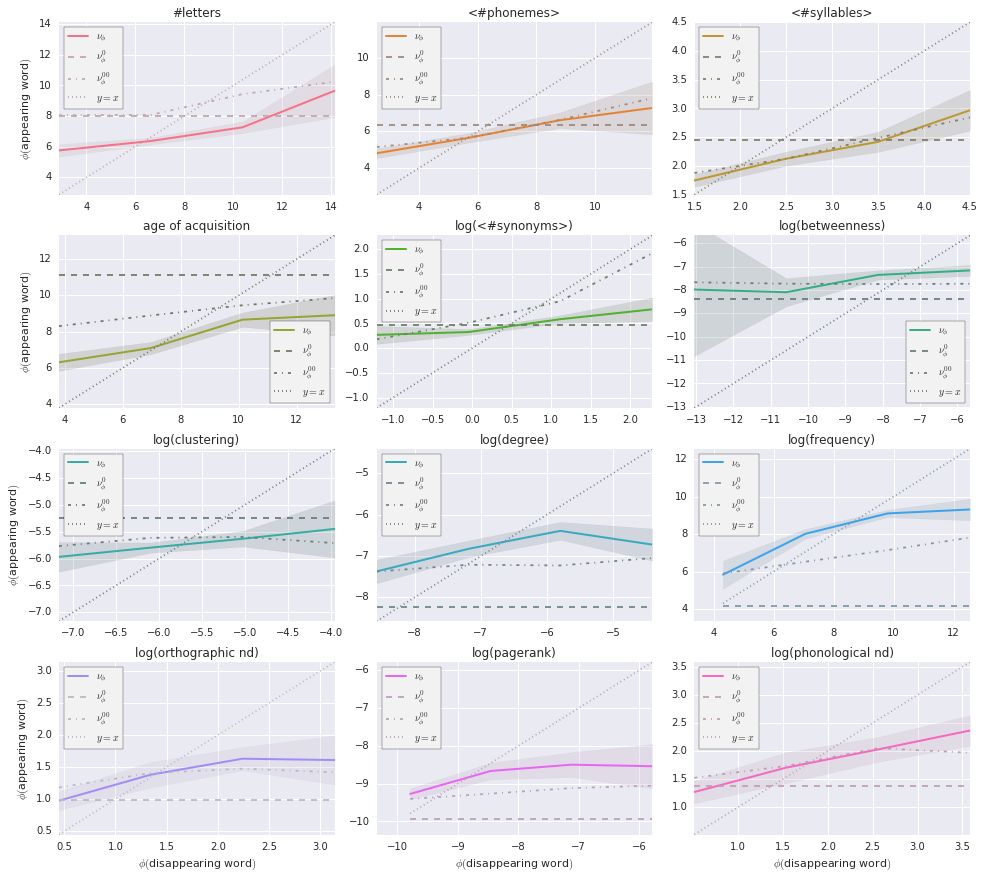

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

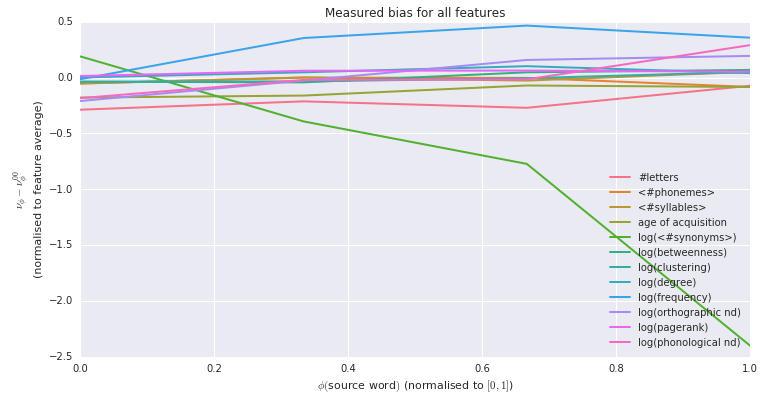

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | **  |
H_00 | **  | ns. | ns. | ns. |


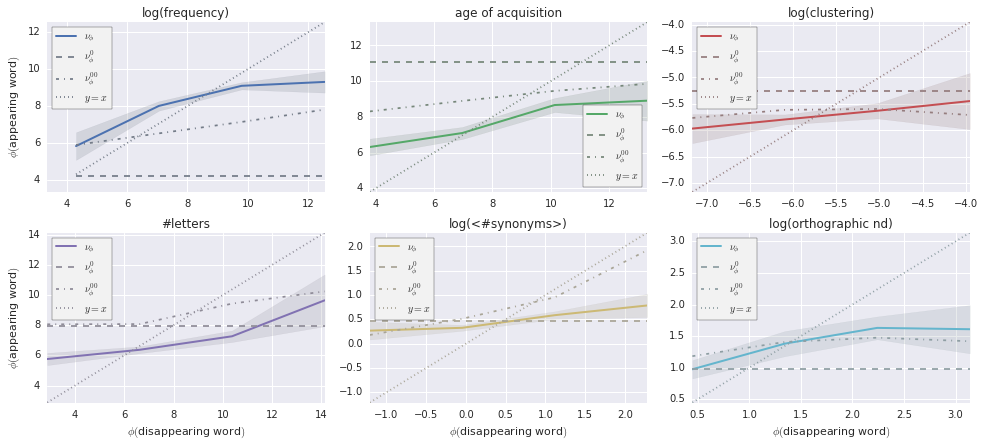

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

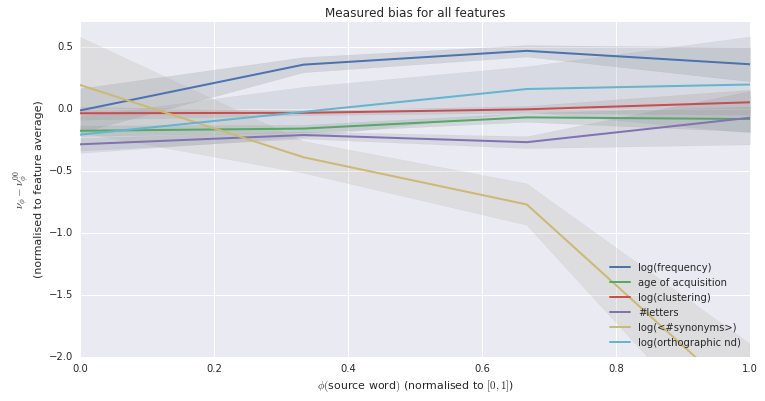

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | ns. |
H_00 | **  | *   | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | ns. |
H_00 | *   | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | *   | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | **  | ns. | ns. | **  |


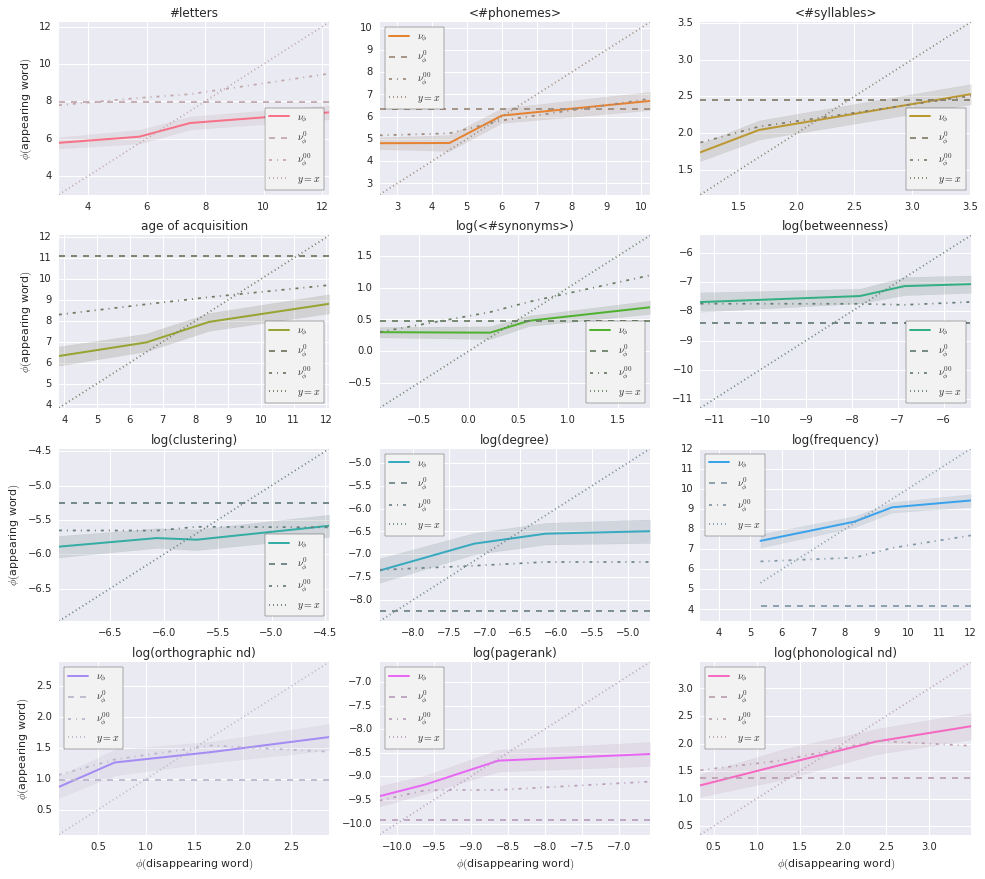

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

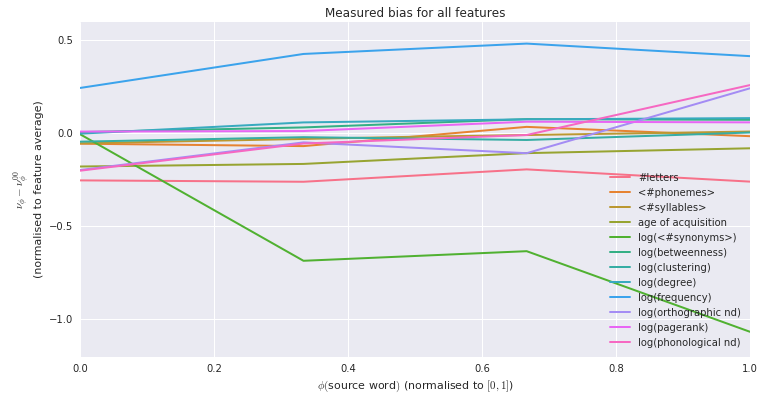

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | *   |


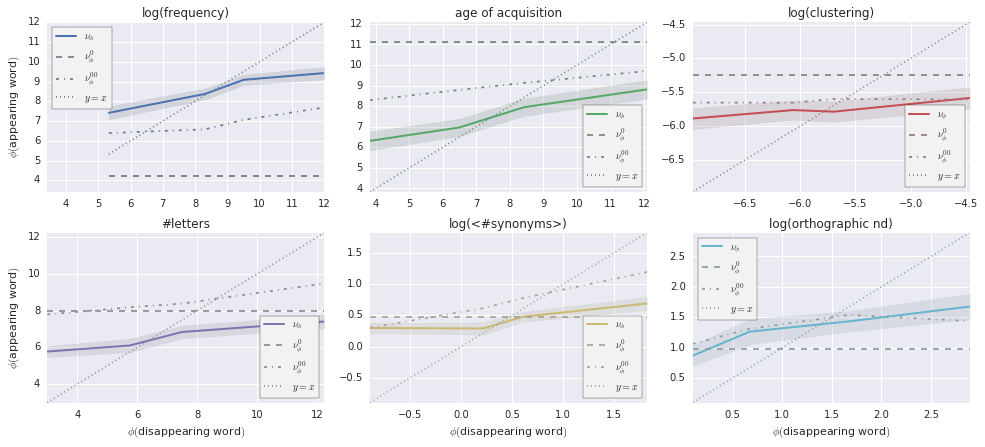

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

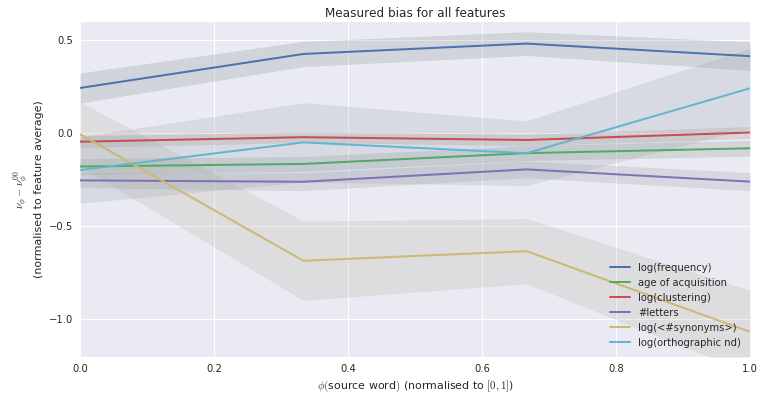

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |


H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | **  |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *   | *   |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *   | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | *** | *** | *   |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | *   | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | **  | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | **  | ns. | ns. | ns. |


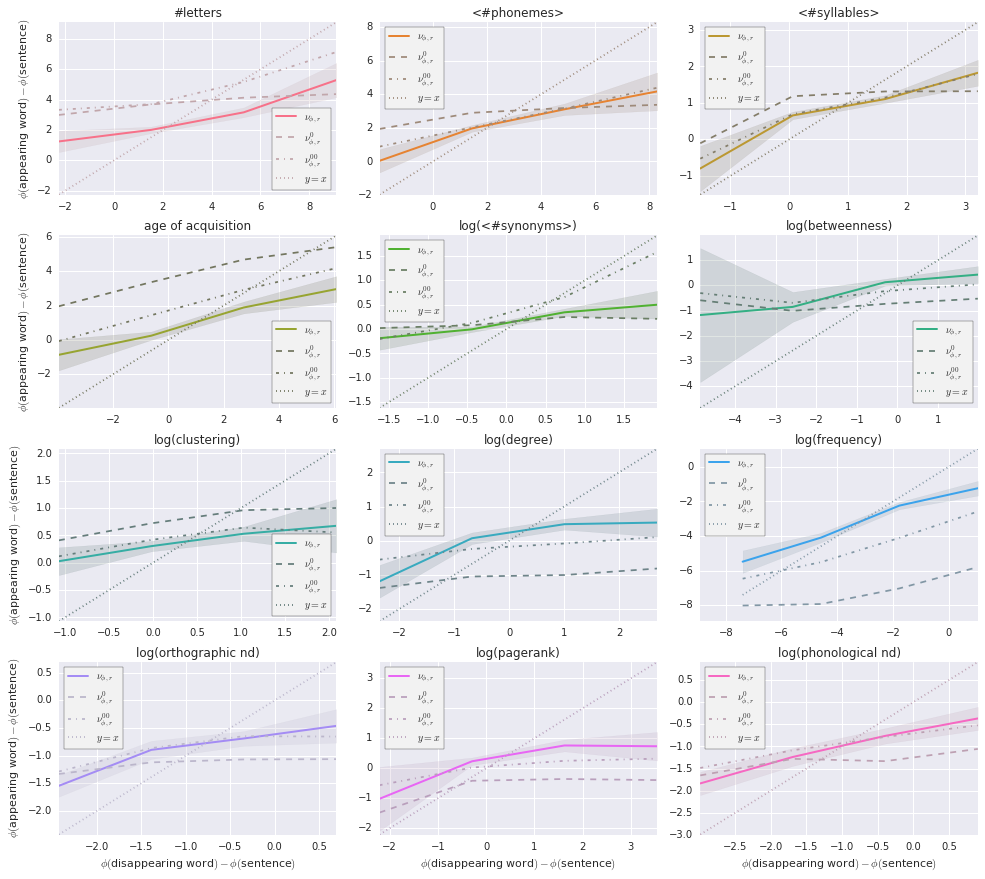

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

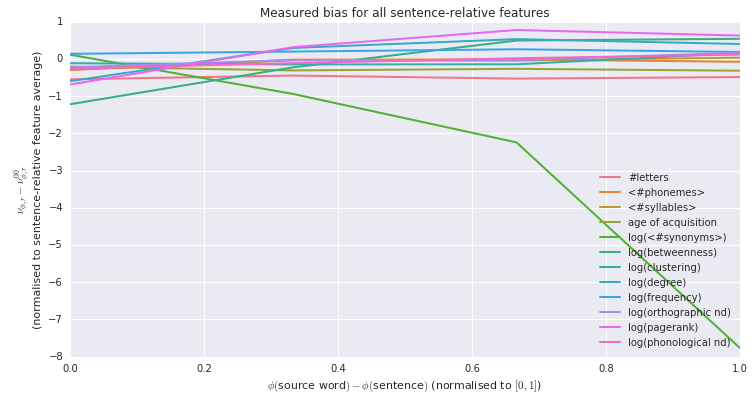

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *   | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | **  |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *   | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | *   | ns. | ns. | ns. |


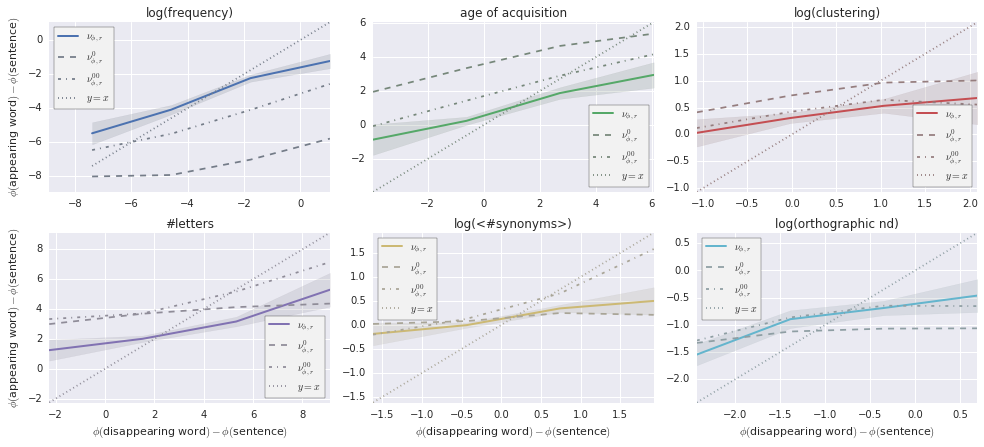

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

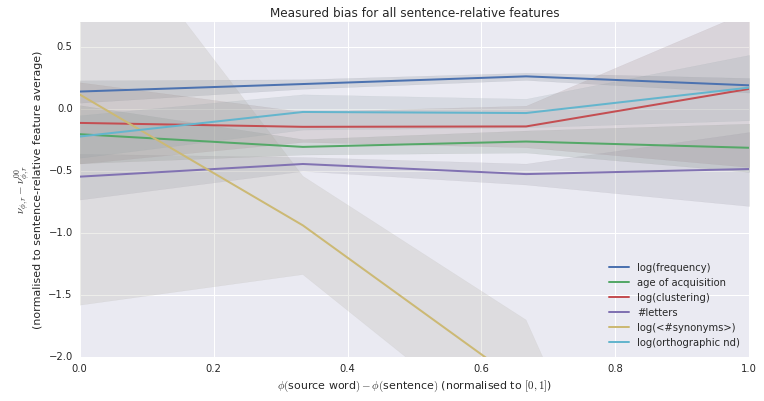

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |


H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |
H_00 | ns. | **  | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | *   | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | **  | ns. | ns. | ns. |


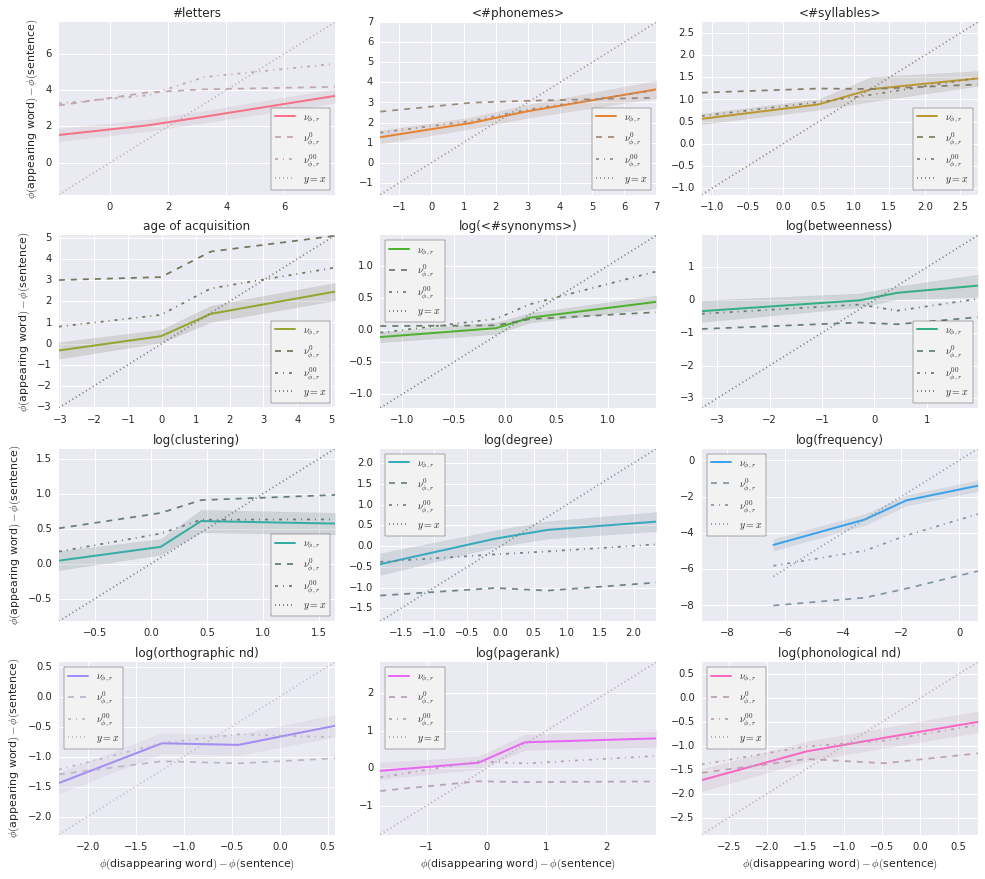

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

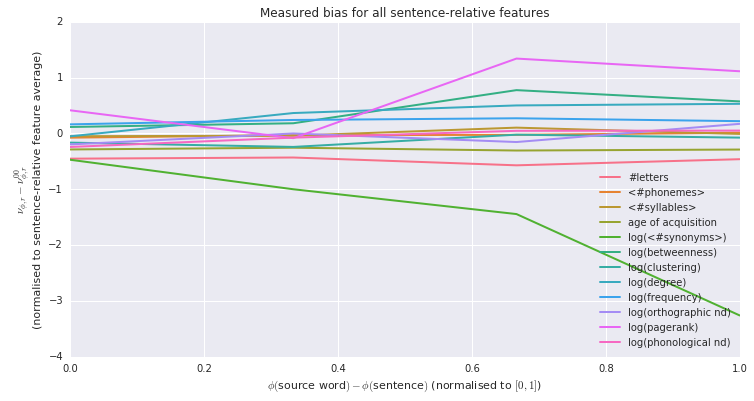

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |
H_00 | ns. | **  | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *   | ns. | *   | *   |


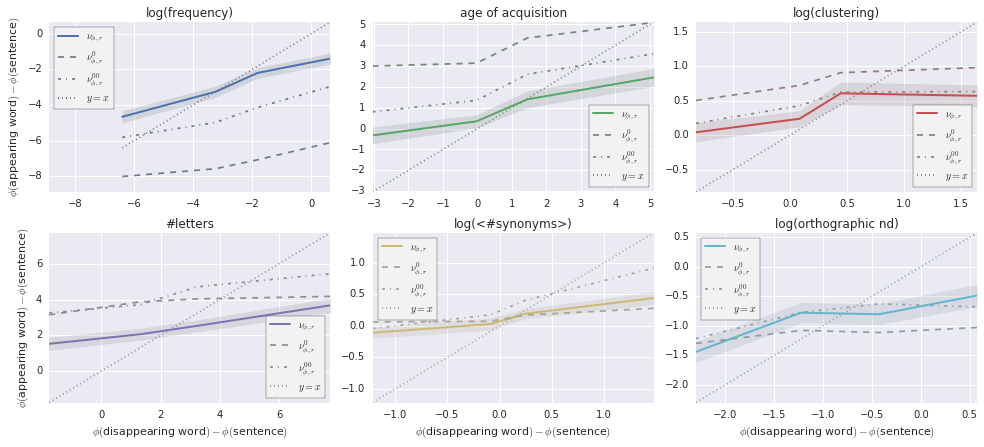

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

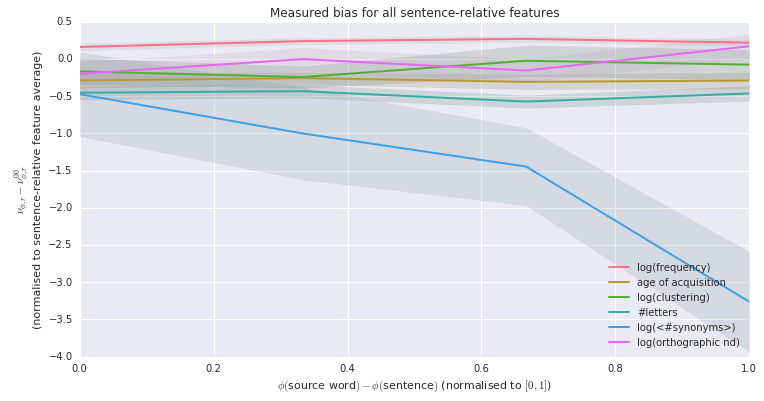

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


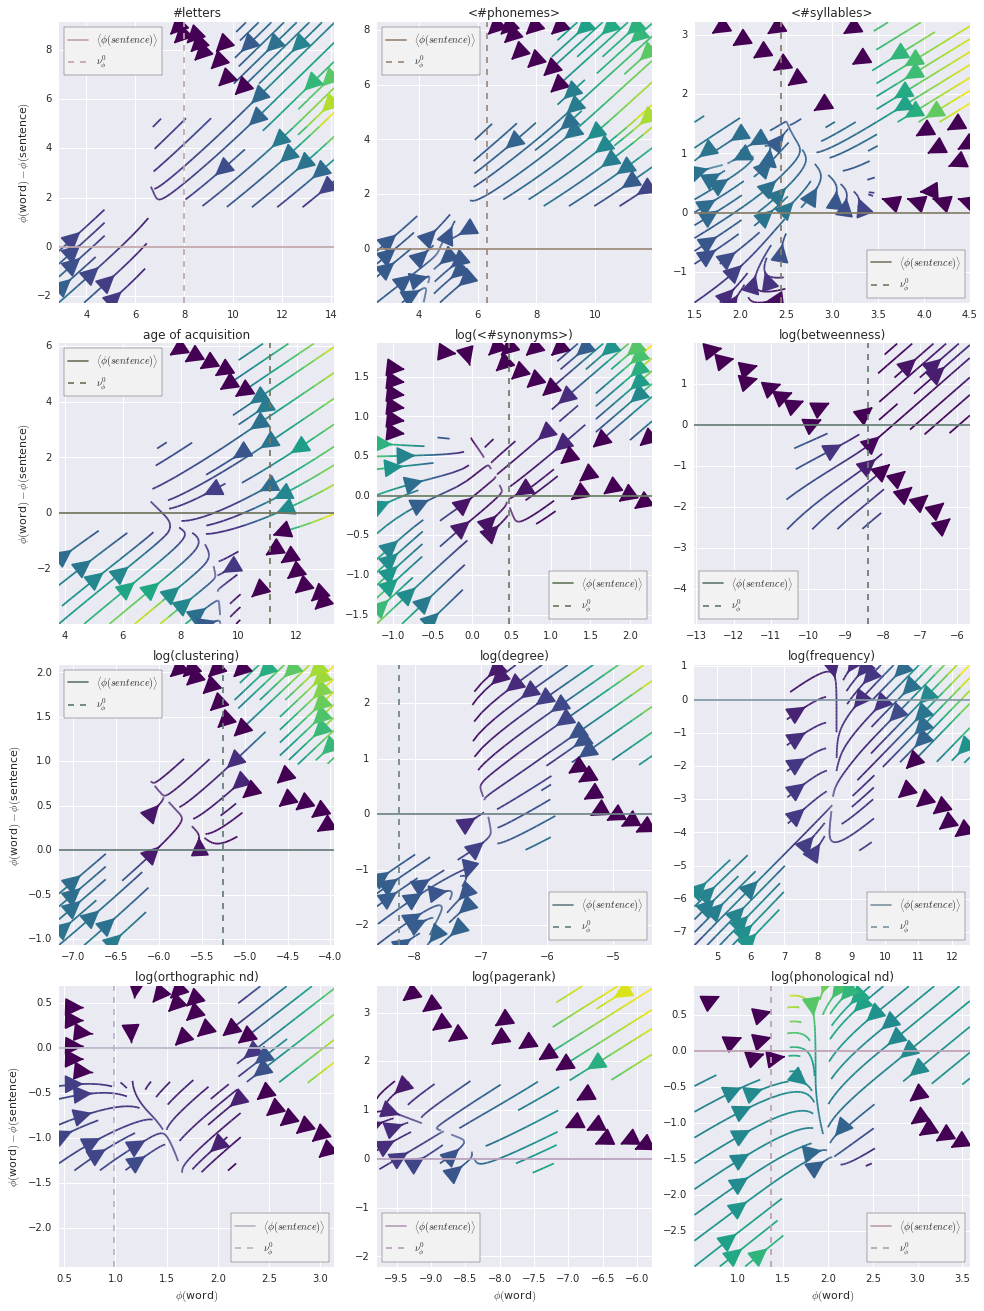

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


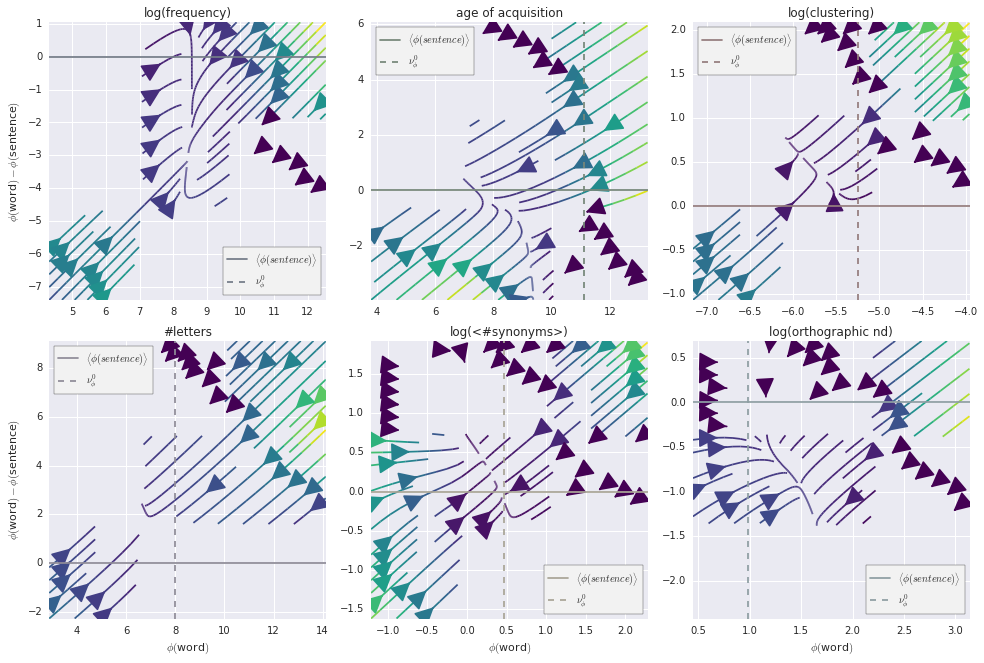

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55122311  0.17694431  0.07010802  0.06688494  0.03303531  0.02842675
  0.0197582   0.01801932  0.01455933  0.00991983]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.480639,0.235220,-0.085941,0.223020,0.221617,-0.459272,0.208394,0.257139,-0.429278,0.269621,-0.172668,0.012316
Component-1,0.367462,-0.361454,0.135680,-0.278595,-0.326051,-0.403357,0.125370,-0.298287,-0.445819,0.197887,-0.162948,0.011571
Component-2,-0.760629,-0.491724,0.057437,-0.135817,-0.315228,0.131807,0.047868,-0.161522,0.058676,-0.079684,0.037981,0.039356


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 8978) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  16 of 8978) |                       | Elapsed Time: 0:00:42 ETA: 6:34:41

  0% (  41 of 8978) |                       | Elapsed Time: 0:00:42 ETA: 2:34:21

  0% (  66 of 8978) |                       | Elapsed Time: 0:00:42 ETA: 1:36:05

  1% (  90 of 8978) |                       | Elapsed Time: 0:00:42 ETA: 1:10:37

  1% ( 125 of 8978) |                       | Elapsed Time: 0:00:43 ETA: 0:01:15

  1% ( 149 of 8978) |                       | Elapsed Time: 0:00:43 ETA: 0:01:16

  1% ( 173 of 8978) |                       | Elapsed Time: 0:00:43 ETA: 0:01:16

  2% ( 198 of 8978) |                       | Elapsed Time: 0:00:43 ETA: 0:01:14

  2% ( 225 of 8978) |                       | Elapsed Time: 0:00:44 ETA: 0:01:13

  2% ( 255 of 8978) |                       | Elapsed Time: 0:00:44 ETA: 0:01:09

  3% ( 284 of 8978) |                       | Elapsed Time: 0:00:44 ETA: 0:01:06

  3% ( 311 of 8978) |                       | Elapsed Time: 0:00:44 ETA: 0:01:05

  3% ( 352 of 8978) |                       | Elapsed Time: 0:00:44 ETA: 0:01:01

  4% ( 385 of 8978) |                       | Elapsed Time: 0:00:45 ETA: 0:00:59

  4% ( 417 of 8978) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:57

  5% ( 449 of 8978) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:55

  5% ( 480 of 8978) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:55

  5% ( 512 of 8978) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:55

  6% ( 544 of 8978) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:54

  6% ( 578 of 8978) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:54

  6% ( 606 of 8978) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:56

  7% ( 636 of 8978) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:56

  7% ( 674 of 8978) |#                      | Elapsed Time: 0:00:47 ETA: 0:00:58

  7% ( 702 of 8978) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:01

  8% ( 733 of 8978) |#                      | Elapsed Time: 0:00:47 ETA: 0:00:59

  8% ( 771 of 8978) |#                      | Elapsed Time: 0:00:47 ETA: 0:00:55

  8% ( 798 of 8978) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:57

  9% ( 821 of 8978) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:57

  9% ( 843 of 8978) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:00

  9% ( 866 of 8978) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:07

 10% ( 898 of 8978) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:11

 10% ( 917 of 8978) |##                     | Elapsed Time: 0:00:49 ETA: 0:01:13

 10% ( 937 of 8978) |##                     | Elapsed Time: 0:00:49 ETA: 0:01:15

 10% ( 960 of 8978) |##                     | Elapsed Time: 0:00:49 ETA: 0:01:14

 10% ( 987 of 8978) |##                     | Elapsed Time: 0:00:49 ETA: 0:01:12

 11% (1024 of 8978) |##                     | Elapsed Time: 0:00:49 ETA: 0:01:10

 11% (1051 of 8978) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:05

 12% (1080 of 8978) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:01

 12% (1105 of 8978) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:01

 12% (1136 of 8978) |##                     | Elapsed Time: 0:00:50 ETA: 0:01:02

 12% (1150 of 8978) |##                     | Elapsed Time: 0:00:51 ETA: 0:01:10

 12% (1162 of 8978) |##                     | Elapsed Time: 0:00:51 ETA: 0:01:23

 13% (1185 of 8978) |###                    | Elapsed Time: 0:00:51 ETA: 0:01:26

 13% (1203 of 8978) |###                    | Elapsed Time: 0:00:51 ETA: 0:01:33

 13% (1235 of 8978) |###                    | Elapsed Time: 0:00:51 ETA: 0:01:29

 14% (1267 of 8978) |###                    | Elapsed Time: 0:00:52 ETA: 0:01:09

 14% (1299 of 8978) |###                    | Elapsed Time: 0:00:52 ETA: 0:01:00

 14% (1329 of 8978) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:55

 15% (1357 of 8978) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:56

 15% (1377 of 8978) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:01

 15% (1396 of 8978) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:08

 15% (1415 of 8978) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:19

 15% (1435 of 8978) |###                    | Elapsed Time: 0:00:53 ETA: 0:01:21

 16% (1459 of 8978) |###                    | Elapsed Time: 0:00:54 ETA: 0:01:21

 16% (1479 of 8978) |###                    | Elapsed Time: 0:00:54 ETA: 0:01:20

 16% (1499 of 8978) |###                    | Elapsed Time: 0:00:54 ETA: 0:01:19

 16% (1519 of 8978) |###                    | Elapsed Time: 0:00:54 ETA: 0:01:19

 17% (1539 of 8978) |###                    | Elapsed Time: 0:00:54 ETA: 0:01:19

 17% (1559 of 8978) |###                    | Elapsed Time: 0:00:55 ETA: 0:01:18

 17% (1582 of 8978) |####                   | Elapsed Time: 0:00:55 ETA: 0:01:18

 17% (1602 of 8978) |####                   | Elapsed Time: 0:00:55 ETA: 0:01:18

 18% (1622 of 8978) |####                   | Elapsed Time: 0:00:55 ETA: 0:01:18

 18% (1646 of 8978) |####                   | Elapsed Time: 0:00:55 ETA: 0:01:15

 18% (1668 of 8978) |####                   | Elapsed Time: 0:00:56 ETA: 0:01:13

 18% (1701 of 8978) |####                   | Elapsed Time: 0:00:56 ETA: 0:01:03

 19% (1728 of 8978) |####                   | Elapsed Time: 0:00:56 ETA: 0:00:59

 19% (1752 of 8978) |####                   | Elapsed Time: 0:00:56 ETA: 0:00:58

 19% (1774 of 8978) |####                   | Elapsed Time: 0:00:57 ETA: 0:00:58

 20% (1796 of 8978) |####                   | Elapsed Time: 0:00:57 ETA: 0:01:00

 20% (1818 of 8978) |####                   | Elapsed Time: 0:00:57 ETA: 0:01:06

 20% (1841 of 8978) |####                   | Elapsed Time: 0:00:57 ETA: 0:01:06

 20% (1868 of 8978) |####                   | Elapsed Time: 0:00:57 ETA: 0:01:03

 21% (1896 of 8978) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:59

 21% (1920 of 8978) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:58

 21% (1943 of 8978) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:57

 21% (1957 of 8978) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:04

 22% (1981 of 8978) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:07

 22% (2021 of 8978) |#####                  | Elapsed Time: 0:00:59 ETA: 0:01:04

 22% (2055 of 8978) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:57

 23% (2089 of 8978) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:49

 23% (2133 of 8978) |#####                  | Elapsed Time: 0:00:59 ETA: 0:00:43

 24% (2167 of 8978) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:41

 24% (2201 of 8978) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:40

 25% (2245 of 8978) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:40

 25% (2279 of 8978) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:40

 25% (2313 of 8978) |#####                  | Elapsed Time: 0:01:00 ETA: 0:00:40

 26% (2336 of 8978) |#####                  | Elapsed Time: 0:01:01 ETA: 0:00:43

 26% (2357 of 8978) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:49

 26% (2377 of 8978) |######                 | Elapsed Time: 0:01:01 ETA: 0:00:56

 26% (2397 of 8978) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:04

 26% (2417 of 8978) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:12

 27% (2437 of 8978) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:08

 27% (2457 of 8978) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:07

 27% (2479 of 8978) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:07

 27% (2499 of 8978) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:06

 28% (2519 of 8978) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:06

 28% (2539 of 8978) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:06

 28% (2567 of 8978) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:00

 28% (2589 of 8978) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:00

 29% (2609 of 8978) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:00

 29% (2640 of 8978) |######                 | Elapsed Time: 0:01:04 ETA: 0:00:54

 29% (2667 of 8978) |######                 | Elapsed Time: 0:01:04 ETA: 0:00:52

 30% (2694 of 8978) |######                 | Elapsed Time: 0:01:04 ETA: 0:00:54

 30% (2718 of 8978) |######                 | Elapsed Time: 0:01:04 ETA: 0:00:48

 30% (2737 of 8978) |#######                | Elapsed Time: 0:01:04 ETA: 0:00:53

 30% (2753 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:00:59

 30% (2776 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:02

 31% (2806 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:03

 31% (2835 of 8978) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:00

 31% (2868 of 8978) |#######                | Elapsed Time: 0:01:06 ETA: 0:00:51

 32% (2900 of 8978) |#######                | Elapsed Time: 0:01:06 ETA: 0:00:44

 32% (2932 of 8978) |#######                | Elapsed Time: 0:01:06 ETA: 0:00:44

 32% (2959 of 8978) |#######                | Elapsed Time: 0:01:06 ETA: 0:00:41

 33% (2979 of 8978) |#######                | Elapsed Time: 0:01:07 ETA: 0:00:45

 33% (2999 of 8978) |#######                | Elapsed Time: 0:01:07 ETA: 0:00:49

 33% (3031 of 8978) |#######                | Elapsed Time: 0:01:07 ETA: 0:00:51

 34% (3057 of 8978) |#######                | Elapsed Time: 0:01:07 ETA: 0:00:51

 34% (3086 of 8978) |#######                | Elapsed Time: 0:01:07 ETA: 0:00:48

 34% (3114 of 8978) |#######                | Elapsed Time: 0:01:08 ETA: 0:00:45

 35% (3143 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:00:43

 35% (3173 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:00:43

 35% (3203 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:00:42

 36% (3233 of 8978) |########               | Elapsed Time: 0:01:08 ETA: 0:00:41

 36% (3266 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:00:41

 36% (3288 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:00:43

 36% (3311 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:00:46

 37% (3331 of 8978) |########               | Elapsed Time: 0:01:09 ETA: 0:00:51

 37% (3367 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:00:52

 37% (3397 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:00:48

 38% (3425 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:00:45

 38% (3459 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:00:40

 38% (3496 of 8978) |########               | Elapsed Time: 0:01:10 ETA: 0:00:37

 39% (3527 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:00:37

 39% (3556 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:00:36

 40% (3592 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:00:36

 40% (3615 of 8978) |#########              | Elapsed Time: 0:01:11 ETA: 0:00:39

 40% (3636 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:00:42

 40% (3663 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:00:42

 41% (3689 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:00:44

 41% (3719 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:00:43

 41% (3737 of 8978) |#########              | Elapsed Time: 0:01:12 ETA: 0:00:43

 41% (3756 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:00:46

 42% (3793 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:00:41

 42% (3831 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:00:41

 42% (3856 of 8978) |#########              | Elapsed Time: 0:01:13 ETA: 0:00:40

 43% (3890 of 8978) |#########              | Elapsed Time: 0:01:14 ETA: 0:00:36

 43% (3928 of 8978) |##########             | Elapsed Time: 0:01:14 ETA: 0:00:35

 43% (3950 of 8978) |##########             | Elapsed Time: 0:01:14 ETA: 0:00:38

 44% (3972 of 8978) |##########             | Elapsed Time: 0:01:14 ETA: 0:00:39

 44% (4001 of 8978) |##########             | Elapsed Time: 0:01:14 ETA: 0:00:39

 45% (4041 of 8978) |##########             | Elapsed Time: 0:01:15 ETA: 0:00:40

 45% (4067 of 8978) |##########             | Elapsed Time: 0:01:15 ETA: 0:00:39

 45% (4100 of 8978) |##########             | Elapsed Time: 0:01:15 ETA: 0:00:36

 46% (4134 of 8978) |##########             | Elapsed Time: 0:01:15 ETA: 0:00:33

 46% (4167 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:00:33

 46% (4185 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:00:35

 46% (4211 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:00:35

 47% (4251 of 8978) |##########             | Elapsed Time: 0:01:16 ETA: 0:00:38

 47% (4279 of 8978) |##########             | Elapsed Time: 0:01:17 ETA: 0:00:39

 47% (4307 of 8978) |###########            | Elapsed Time: 0:01:17 ETA: 0:00:35

 48% (4336 of 8978) |###########            | Elapsed Time: 0:01:17 ETA: 0:00:34

 48% (4377 of 8978) |###########            | Elapsed Time: 0:01:17 ETA: 0:00:34

 49% (4407 of 8978) |###########            | Elapsed Time: 0:01:17 ETA: 0:00:32

 49% (4437 of 8978) |###########            | Elapsed Time: 0:01:18 ETA: 0:00:31

 49% (4466 of 8978) |###########            | Elapsed Time: 0:01:18 ETA: 0:00:31

 50% (4505 of 8978) |###########            | Elapsed Time: 0:01:18 ETA: 0:00:31

 50% (4529 of 8978) |###########            | Elapsed Time: 0:01:18 ETA: 0:00:32

 50% (4556 of 8978) |###########            | Elapsed Time: 0:01:19 ETA: 0:00:32

 51% (4585 of 8978) |###########            | Elapsed Time: 0:01:19 ETA: 0:00:33

 51% (4614 of 8978) |###########            | Elapsed Time: 0:01:19 ETA: 0:00:34

 51% (4638 of 8978) |###########            | Elapsed Time: 0:01:19 ETA: 0:00:35

 51% (4662 of 8978) |###########            | Elapsed Time: 0:01:19 ETA: 0:00:35

 52% (4686 of 8978) |############           | Elapsed Time: 0:01:20 ETA: 0:00:36

 52% (4714 of 8978) |############           | Elapsed Time: 0:01:20 ETA: 0:00:36

 52% (4738 of 8978) |############           | Elapsed Time: 0:01:20 ETA: 0:00:36

 53% (4762 of 8978) |############           | Elapsed Time: 0:01:20 ETA: 0:00:35

 53% (4787 of 8978) |############           | Elapsed Time: 0:01:21 ETA: 0:00:35

 53% (4826 of 8978) |############           | Elapsed Time: 0:01:21 ETA: 0:00:33

 53% (4848 of 8978) |############           | Elapsed Time: 0:01:21 ETA: 0:00:33

 54% (4872 of 8978) |############           | Elapsed Time: 0:01:21 ETA: 0:00:33

 54% (4896 of 8978) |############           | Elapsed Time: 0:01:21 ETA: 0:00:33

 54% (4921 of 8978) |############           | Elapsed Time: 0:01:22 ETA: 0:00:33

 55% (4949 of 8978) |############           | Elapsed Time: 0:01:22 ETA: 0:00:34

 55% (4982 of 8978) |############           | Elapsed Time: 0:01:22 ETA: 0:00:31

 55% (5005 of 8978) |############           | Elapsed Time: 0:01:22 ETA: 0:00:31

 55% (5027 of 8978) |############           | Elapsed Time: 0:01:22 ETA: 0:00:32

 56% (5065 of 8978) |############           | Elapsed Time: 0:01:23 ETA: 0:00:31

 56% (5095 of 8978) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:30

 57% (5126 of 8978) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:29

 57% (5147 of 8978) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:29

 57% (5177 of 8978) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:29

 57% (5206 of 8978) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:29

 58% (5232 of 8978) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:30

 58% (5258 of 8978) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:29

 58% (5287 of 8978) |#############          | Elapsed Time: 0:01:25 ETA: 0:00:28

 59% (5313 of 8978) |#############          | Elapsed Time: 0:01:25 ETA: 0:00:29

 59% (5339 of 8978) |#############          | Elapsed Time: 0:01:25 ETA: 0:00:29

 59% (5365 of 8978) |#############          | Elapsed Time: 0:01:25 ETA: 0:00:28

 60% (5399 of 8978) |#############          | Elapsed Time: 0:01:25 ETA: 0:00:28

 60% (5422 of 8978) |#############          | Elapsed Time: 0:01:26 ETA: 0:00:29

 60% (5445 of 8978) |#############          | Elapsed Time: 0:01:26 ETA: 0:00:29

 60% (5472 of 8978) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:29

 61% (5515 of 8978) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:27

 61% (5537 of 8978) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:27

 61% (5562 of 8978) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:27

 62% (5591 of 8978) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:26

 62% (5629 of 8978) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:25

 63% (5661 of 8978) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:23

 63% (5692 of 8978) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:21

 63% (5724 of 8978) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:21

 64% (5752 of 8978) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:21

 64% (5781 of 8978) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:21

 64% (5816 of 8978) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:21

 65% (5849 of 8978) |##############         | Elapsed Time: 0:01:29 ETA: 0:00:22

 65% (5875 of 8978) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:23

 65% (5895 of 8978) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:24

 65% (5915 of 8978) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:26

 66% (5948 of 8978) |###############        | Elapsed Time: 0:01:30 ETA: 0:00:27

 66% (5980 of 8978) |###############        | Elapsed Time: 0:01:30 ETA: 0:00:24

 66% (6009 of 8978) |###############        | Elapsed Time: 0:01:30 ETA: 0:00:23

 67% (6035 of 8978) |###############        | Elapsed Time: 0:01:30 ETA: 0:00:21

 67% (6072 of 8978) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:21

 67% (6096 of 8978) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:21

 68% (6123 of 8978) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:22

 68% (6155 of 8978) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:21

 68% (6181 of 8978) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:21

 69% (6201 of 8978) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:22

 69% (6234 of 8978) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:20

 69% (6265 of 8978) |################       | Elapsed Time: 0:01:32 ETA: 0:00:20

 70% (6302 of 8978) |################       | Elapsed Time: 0:01:32 ETA: 0:00:19

 70% (6335 of 8978) |################       | Elapsed Time: 0:01:32 ETA: 0:00:17

 70% (6364 of 8978) |################       | Elapsed Time: 0:01:33 ETA: 0:00:16

 71% (6397 of 8978) |################       | Elapsed Time: 0:01:33 ETA: 0:00:18

 71% (6421 of 8978) |################       | Elapsed Time: 0:01:33 ETA: 0:00:19

 71% (6450 of 8978) |################       | Elapsed Time: 0:01:33 ETA: 0:00:19

 72% (6477 of 8978) |################       | Elapsed Time: 0:01:34 ETA: 0:00:20

 72% (6510 of 8978) |################       | Elapsed Time: 0:01:34 ETA: 0:00:20

 72% (6535 of 8978) |################       | Elapsed Time: 0:01:34 ETA: 0:00:19

 72% (6547 of 8978) |################       | Elapsed Time: 0:01:34 ETA: 0:00:22

 73% (6571 of 8978) |################       | Elapsed Time: 0:01:34 ETA: 0:00:23

 73% (6600 of 8978) |################       | Elapsed Time: 0:01:35 ETA: 0:00:21

 73% (6637 of 8978) |#################      | Elapsed Time: 0:01:35 ETA: 0:00:21

 74% (6665 of 8978) |#################      | Elapsed Time: 0:01:35 ETA: 0:00:18

 74% (6677 of 8978) |#################      | Elapsed Time: 0:01:35 ETA: 0:00:18

 74% (6689 of 8978) |#################      | Elapsed Time: 0:01:36 ETA: 0:00:22

 74% (6713 of 8978) |#################      | Elapsed Time: 0:01:36 ETA: 0:00:23

 75% (6748 of 8978) |#################      | Elapsed Time: 0:01:36 ETA: 0:00:22

 75% (6779 of 8978) |#################      | Elapsed Time: 0:01:36 ETA: 0:00:20

 75% (6793 of 8978) |#################      | Elapsed Time: 0:01:36 ETA: 0:00:19

 75% (6817 of 8978) |#################      | Elapsed Time: 0:01:37 ETA: 0:00:17

 76% (6846 of 8978) |#################      | Elapsed Time: 0:01:37 ETA: 0:00:19

 76% (6875 of 8978) |#################      | Elapsed Time: 0:01:37 ETA: 0:00:18

 76% (6903 of 8978) |#################      | Elapsed Time: 0:01:37 ETA: 0:00:17

 77% (6922 of 8978) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:17

 77% (6958 of 8978) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:16

 77% (6986 of 8978) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:16

 78% (7020 of 8978) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:15

 78% (7046 of 8978) |##################     | Elapsed Time: 0:01:38 ETA: 0:00:14

 78% (7082 of 8978) |##################     | Elapsed Time: 0:01:39 ETA: 0:00:13

 79% (7111 of 8978) |##################     | Elapsed Time: 0:01:39 ETA: 0:00:13

 79% (7135 of 8978) |##################     | Elapsed Time: 0:01:39 ETA: 0:00:13

 79% (7161 of 8978) |##################     | Elapsed Time: 0:01:39 ETA: 0:00:14

 80% (7196 of 8978) |##################     | Elapsed Time: 0:01:40 ETA: 0:00:14

 80% (7222 of 8978) |##################     | Elapsed Time: 0:01:40 ETA: 0:00:13

 80% (7250 of 8978) |##################     | Elapsed Time: 0:01:40 ETA: 0:00:13

 81% (7281 of 8978) |##################     | Elapsed Time: 0:01:40 ETA: 0:00:12

 81% (7312 of 8978) |##################     | Elapsed Time: 0:01:40 ETA: 0:00:12

 81% (7342 of 8978) |##################     | Elapsed Time: 0:01:41 ETA: 0:00:11

 82% (7377 of 8978) |##################     | Elapsed Time: 0:01:41 ETA: 0:00:10

 82% (7407 of 8978) |##################     | Elapsed Time: 0:01:41 ETA: 0:00:10

 82% (7439 of 8978) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:10

 83% (7476 of 8978) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:09

 83% (7508 of 8978) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:09

 83% (7532 of 8978) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:09

 84% (7557 of 8978) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:09

 84% (7585 of 8978) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:10

 84% (7609 of 8978) |###################    | Elapsed Time: 0:01:43 ETA: 0:00:11

 85% (7646 of 8978) |###################    | Elapsed Time: 0:01:43 ETA: 0:00:10

 85% (7668 of 8978) |###################    | Elapsed Time: 0:01:43 ETA: 0:00:10

 85% (7686 of 8978) |###################    | Elapsed Time: 0:01:43 ETA: 0:00:11

 85% (7710 of 8978) |###################    | Elapsed Time: 0:01:43 ETA: 0:00:11

 86% (7744 of 8978) |###################    | Elapsed Time: 0:01:44 ETA: 0:00:11

 86% (7766 of 8978) |###################    | Elapsed Time: 0:01:44 ETA: 0:00:11

 86% (7795 of 8978) |###################    | Elapsed Time: 0:01:44 ETA: 0:00:10

 87% (7826 of 8978) |####################   | Elapsed Time: 0:01:44 ETA: 0:00:09

 87% (7838 of 8978) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:10

 87% (7870 of 8978) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:09

 87% (7897 of 8978) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:09

 88% (7907 of 8978) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:11

 88% (7917 of 8978) |####################   | Elapsed Time: 0:01:46 ETA: 0:00:12

 88% (7938 of 8978) |####################   | Elapsed Time: 0:01:46 ETA: 0:00:11

 88% (7980 of 8978) |####################   | Elapsed Time: 0:01:46 ETA: 0:00:11

 89% (8008 of 8978) |####################   | Elapsed Time: 0:01:46 ETA: 0:00:09

 89% (8030 of 8978) |####################   | Elapsed Time: 0:01:46 ETA: 0:00:08

 89% (8069 of 8978) |####################   | Elapsed Time: 0:01:47 ETA: 0:00:07

 90% (8095 of 8978) |####################   | Elapsed Time: 0:01:47 ETA: 0:00:07

 90% (8122 of 8978) |####################   | Elapsed Time: 0:01:47 ETA: 0:00:07

 90% (8153 of 8978) |####################   | Elapsed Time: 0:01:47 ETA: 0:00:06

 91% (8175 of 8978) |####################   | Elapsed Time: 0:01:48 ETA: 0:00:07

 91% (8207 of 8978) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:06

 91% (8236 of 8978) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:05

 92% (8260 of 8978) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:05

 92% (8305 of 8978) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:05

 92% (8331 of 8978) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:04

 93% (8350 of 8978) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:04

 93% (8376 of 8978) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:04

 93% (8417 of 8978) |#####################  | Elapsed Time: 0:01:50 ETA: 0:00:04

 94% (8442 of 8978) |#####################  | Elapsed Time: 0:01:50 ETA: 0:00:04

 94% (8474 of 8978) |#####################  | Elapsed Time: 0:01:50 ETA: 0:00:03

 94% (8505 of 8978) |#####################  | Elapsed Time: 0:01:50 ETA: 0:00:03

 95% (8543 of 8978) |#####################  | Elapsed Time: 0:01:50 ETA: 0:00:03

 95% (8567 of 8978) |#####################  | Elapsed Time: 0:01:51 ETA: 0:00:02

 95% (8597 of 8978) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:02

 96% (8621 of 8978) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:02

 96% (8657 of 8978) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:02

 96% (8688 of 8978) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:02

 97% (8718 of 8978) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 97% (8754 of 8978) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 97% (8783 of 8978) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 98% (8809 of 8978) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 98% (8840 of 8978) |###################### | Elapsed Time: 0:01:53 ETA: 0:00:01

 98% (8877 of 8978) |###################### | Elapsed Time: 0:01:53 ETA: 0:00:00

 99% (8902 of 8978) |###################### | Elapsed Time: 0:01:53 ETA: 0:00:00

 99% (8929 of 8978) |###################### | Elapsed Time: 0:01:53 ETA: 0:00:00

 99% (8960 of 8978) |###################### | Elapsed Time: 0:01:54 ETA: 0:00:00

100% (8978 of 8978) |######################| Elapsed Time: 0:01:54 Time: 0:01:54


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | **  | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |


H_00 | *   | *   | ns. | ns. |


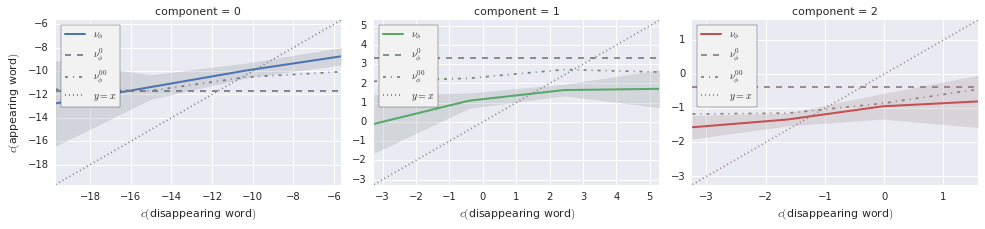

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.66563708  0.2072879 ]



,aoa,frequency,letters_count
Component-0,-0.761088,0.339546,-0.552678
Component-1,0.423269,-0.385666,-0.819820


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 8978) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  16 of 8978) |                       | Elapsed Time: 0:00:02 ETA: 0:27:57

  0% (  46 of 8978) |                       | Elapsed Time: 0:00:03 ETA: 0:10:21

  0% (  77 of 8978) |                       | Elapsed Time: 0:00:03 ETA: 0:06:34

  1% ( 113 of 8978) |                       | Elapsed Time: 0:00:03 ETA: 0:05:00

  1% ( 143 of 8978) |                       | Elapsed Time: 0:00:03 ETA: 0:01:01

  1% ( 173 of 8978) |                       | Elapsed Time: 0:00:04 ETA: 0:01:01

  2% ( 203 of 8978) |                       | Elapsed Time: 0:00:04 ETA: 0:01:01

  2% ( 244 of 8978) |                       | Elapsed Time: 0:00:04 ETA: 0:00:58

  3% ( 280 of 8978) |                       | Elapsed Time: 0:00:04 ETA: 0:00:56

  3% ( 312 of 8978) |                       | Elapsed Time: 0:00:04 ETA: 0:00:55

  3% ( 353 of 8978) |                       | Elapsed Time: 0:00:05 ETA: 0:00:53

  4% ( 389 of 8978) |                       | Elapsed Time: 0:00:05 ETA: 0:00:51

  4% ( 423 of 8978) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:51

  5% ( 468 of 8978) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:50

  5% ( 505 of 8978) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:48

  6% ( 543 of 8978) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:47

  6% ( 581 of 8978) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:46

  6% ( 615 of 8978) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:46

  7% ( 651 of 8978) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:46

  7% ( 692 of 8978) |#                      | Elapsed Time: 0:00:07 ETA: 0:00:47

  8% ( 730 of 8978) |#                      | Elapsed Time: 0:00:07 ETA: 0:00:47

  8% ( 769 of 8978) |#                      | Elapsed Time: 0:00:07 ETA: 0:00:45

  8% ( 801 of 8978) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:47

  9% ( 833 of 8978) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:47

  9% ( 865 of 8978) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:48

 10% ( 898 of 8978) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:50

 10% ( 928 of 8978) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:52

 10% ( 961 of 8978) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:51

 11% (1011 of 8978) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:50

 11% (1047 of 8978) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:48

 12% (1084 of 8978) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:46

 12% (1123 of 8978) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:45

 12% (1151 of 8978) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:47

 13% (1177 of 8978) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:50

 13% (1207 of 8978) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:52

 13% (1253 of 8978) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:52

 14% (1291 of 8978) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:50

 14% (1328 of 8978) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:45

 15% (1361 of 8978) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:46

 15% (1389 of 8978) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:48

 15% (1416 of 8978) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:52

 16% (1443 of 8978) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:56

 16% (1473 of 8978) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:58

 16% (1500 of 8978) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:58

 16% (1526 of 8978) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:57

 17% (1552 of 8978) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:58

 17% (1586 of 8978) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:57

 17% (1613 of 8978) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:57

 18% (1643 of 8978) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:55

 18% (1684 of 8978) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:51

 19% (1721 of 8978) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:47

 19% (1754 of 8978) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:44

 19% (1782 of 8978) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:44

 20% (1811 of 8978) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:45

 20% (1841 of 8978) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:46

 20% (1877 of 8978) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:46

 21% (1925 of 8978) |####                   | Elapsed Time: 0:00:15 ETA: 0:00:45

 21% (1953 of 8978) |#####                  | Elapsed Time: 0:00:15 ETA: 0:00:46

 22% (1984 of 8978) |#####                  | Elapsed Time: 0:00:15 ETA: 0:00:45

 22% (2021 of 8978) |#####                  | Elapsed Time: 0:00:15 ETA: 0:00:43

 22% (2063 of 8978) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:42

 23% (2105 of 8978) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:39

 23% (2154 of 8978) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:35

 24% (2194 of 8978) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:34

 25% (2245 of 8978) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:33

 25% (2286 of 8978) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:33

 25% (2325 of 8978) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:33

 26% (2357 of 8978) |######                 | Elapsed Time: 0:00:17 ETA: 0:00:36

 26% (2385 of 8978) |######                 | Elapsed Time: 0:00:17 ETA: 0:00:39

 26% (2412 of 8978) |######                 | Elapsed Time: 0:00:18 ETA: 0:00:43

 27% (2441 of 8978) |######                 | Elapsed Time: 0:00:18 ETA: 0:00:47

 27% (2484 of 8978) |######                 | Elapsed Time: 0:00:18 ETA: 0:00:47

 27% (2511 of 8978) |######                 | Elapsed Time: 0:00:18 ETA: 0:00:48

 28% (2541 of 8978) |######                 | Elapsed Time: 0:00:18 ETA: 0:00:46

 28% (2582 of 8978) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:43

 29% (2610 of 8978) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:43

 29% (2646 of 8978) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:41

 30% (2694 of 8978) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:39

 30% (2727 of 8978) |######                 | Elapsed Time: 0:00:20 ETA: 0:00:39

 30% (2751 of 8978) |#######                | Elapsed Time: 0:00:20 ETA: 0:00:40

 30% (2782 of 8978) |#######                | Elapsed Time: 0:00:20 ETA: 0:00:41

 31% (2823 of 8978) |#######                | Elapsed Time: 0:00:20 ETA: 0:00:41

 31% (2859 of 8978) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:41

 32% (2893 of 8978) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:39

 32% (2936 of 8978) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:36

 33% (2969 of 8978) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:36

 33% (2999 of 8978) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:37

 33% (3048 of 8978) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:36

 34% (3085 of 8978) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:35

 34% (3120 of 8978) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:36

 35% (3161 of 8978) |########               | Elapsed Time: 0:00:22 ETA: 0:00:34

 35% (3197 of 8978) |########               | Elapsed Time: 0:00:23 ETA: 0:00:33

 36% (3233 of 8978) |########               | Elapsed Time: 0:00:23 ETA: 0:00:33

 36% (3270 of 8978) |########               | Elapsed Time: 0:00:23 ETA: 0:00:33

 36% (3300 of 8978) |########               | Elapsed Time: 0:00:23 ETA: 0:00:34

 37% (3329 of 8978) |########               | Elapsed Time: 0:00:23 ETA: 0:00:35

 37% (3367 of 8978) |########               | Elapsed Time: 0:00:24 ETA: 0:00:36

 37% (3403 of 8978) |########               | Elapsed Time: 0:00:24 ETA: 0:00:36

 38% (3438 of 8978) |########               | Elapsed Time: 0:00:24 ETA: 0:00:34

 38% (3479 of 8978) |########               | Elapsed Time: 0:00:24 ETA: 0:00:32

 39% (3515 of 8978) |#########              | Elapsed Time: 0:00:24 ETA: 0:00:31

 39% (3551 of 8978) |#########              | Elapsed Time: 0:00:25 ETA: 0:00:31

 40% (3592 of 8978) |#########              | Elapsed Time: 0:00:25 ETA: 0:00:30

 40% (3622 of 8978) |#########              | Elapsed Time: 0:00:25 ETA: 0:00:31

 40% (3656 of 8978) |#########              | Elapsed Time: 0:00:25 ETA: 0:00:32

 41% (3704 of 8978) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:32

 41% (3734 of 8978) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:33

 41% (3763 of 8978) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:34

 42% (3800 of 8978) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:32

 42% (3834 of 8978) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:32

 43% (3869 of 8978) |#########              | Elapsed Time: 0:00:27 ETA: 0:00:32

 43% (3907 of 8978) |##########             | Elapsed Time: 0:00:27 ETA: 0:00:29

 43% (3943 of 8978) |##########             | Elapsed Time: 0:00:27 ETA: 0:00:29

 44% (3974 of 8978) |##########             | Elapsed Time: 0:00:27 ETA: 0:00:30

 44% (4010 of 8978) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:29

 45% (4058 of 8978) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:29

 45% (4097 of 8978) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:28

 46% (4153 of 8978) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:27

 46% (4183 of 8978) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:27

 46% (4218 of 8978) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:27

 47% (4265 of 8978) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:27

 47% (4300 of 8978) |###########            | Elapsed Time: 0:00:29 ETA: 0:00:27

 48% (4336 of 8978) |###########            | Elapsed Time: 0:00:29 ETA: 0:00:27

 48% (4377 of 8978) |###########            | Elapsed Time: 0:00:30 ETA: 0:00:26

 49% (4415 of 8978) |###########            | Elapsed Time: 0:00:30 ETA: 0:00:25

 49% (4455 of 8978) |###########            | Elapsed Time: 0:00:30 ETA: 0:00:25

 50% (4508 of 8978) |###########            | Elapsed Time: 0:00:30 ETA: 0:00:24

 50% (4543 of 8978) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:24

 51% (4579 of 8978) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:24

 51% (4619 of 8978) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:25

 51% (4651 of 8978) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:25

 52% (4685 of 8978) |############           | Elapsed Time: 0:00:31 ETA: 0:00:25

 52% (4731 of 8978) |############           | Elapsed Time: 0:00:32 ETA: 0:00:25

 53% (4765 of 8978) |############           | Elapsed Time: 0:00:32 ETA: 0:00:25

 53% (4801 of 8978) |############           | Elapsed Time: 0:00:32 ETA: 0:00:25

 53% (4842 of 8978) |############           | Elapsed Time: 0:00:32 ETA: 0:00:24

 54% (4876 of 8978) |############           | Elapsed Time: 0:00:33 ETA: 0:00:24

 54% (4910 of 8978) |############           | Elapsed Time: 0:00:33 ETA: 0:00:24

 55% (4956 of 8978) |############           | Elapsed Time: 0:00:33 ETA: 0:00:24

 55% (4995 of 8978) |############           | Elapsed Time: 0:00:33 ETA: 0:00:23

 55% (5026 of 8978) |############           | Elapsed Time: 0:00:33 ETA: 0:00:23

 56% (5069 of 8978) |############           | Elapsed Time: 0:00:34 ETA: 0:00:22

 56% (5105 of 8978) |#############          | Elapsed Time: 0:00:34 ETA: 0:00:22

 57% (5137 of 8978) |#############          | Elapsed Time: 0:00:34 ETA: 0:00:23

 57% (5180 of 8978) |#############          | Elapsed Time: 0:00:34 ETA: 0:00:22

 58% (5213 of 8978) |#############          | Elapsed Time: 0:00:35 ETA: 0:00:22

 58% (5245 of 8978) |#############          | Elapsed Time: 0:00:35 ETA: 0:00:23

 58% (5291 of 8978) |#############          | Elapsed Time: 0:00:35 ETA: 0:00:23

 59% (5323 of 8978) |#############          | Elapsed Time: 0:00:35 ETA: 0:00:22

 59% (5371 of 8978) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:22

 60% (5402 of 8978) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:22

 60% (5432 of 8978) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:23

 60% (5463 of 8978) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:23

 61% (5500 of 8978) |##############         | Elapsed Time: 0:00:36 ETA: 0:00:22

 61% (5534 of 8978) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:21

 62% (5569 of 8978) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:20

 62% (5612 of 8978) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:19

 62% (5651 of 8978) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:18

 63% (5691 of 8978) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:18

 63% (5743 of 8978) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:17

 64% (5778 of 8978) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:17

 64% (5817 of 8978) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:16

 65% (5853 of 8978) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:17

 65% (5885 of 8978) |###############        | Elapsed Time: 0:00:39 ETA: 0:00:17

 65% (5914 of 8978) |###############        | Elapsed Time: 0:00:39 ETA: 0:00:18

 66% (5967 of 8978) |###############        | Elapsed Time: 0:00:39 ETA: 0:00:18

 66% (6005 of 8978) |###############        | Elapsed Time: 0:00:39 ETA: 0:00:18

 67% (6041 of 8978) |###############        | Elapsed Time: 0:00:39 ETA: 0:00:17

 67% (6076 of 8978) |###############        | Elapsed Time: 0:00:40 ETA: 0:00:16

 68% (6112 of 8978) |###############        | Elapsed Time: 0:00:40 ETA: 0:00:16

 68% (6148 of 8978) |###############        | Elapsed Time: 0:00:40 ETA: 0:00:16

 68% (6186 of 8978) |###############        | Elapsed Time: 0:00:40 ETA: 0:00:16

 69% (6220 of 8978) |###############        | Elapsed Time: 0:00:41 ETA: 0:00:16

 69% (6259 of 8978) |################       | Elapsed Time: 0:00:41 ETA: 0:00:15

 70% (6305 of 8978) |################       | Elapsed Time: 0:00:41 ETA: 0:00:15

 70% (6343 of 8978) |################       | Elapsed Time: 0:00:41 ETA: 0:00:14

 71% (6378 of 8978) |################       | Elapsed Time: 0:00:41 ETA: 0:00:14

 71% (6413 of 8978) |################       | Elapsed Time: 0:00:42 ETA: 0:00:14

 71% (6451 of 8978) |################       | Elapsed Time: 0:00:42 ETA: 0:00:14

 72% (6483 of 8978) |################       | Elapsed Time: 0:00:42 ETA: 0:00:14

 72% (6529 of 8978) |################       | Elapsed Time: 0:00:42 ETA: 0:00:14

 72% (6549 of 8978) |################       | Elapsed Time: 0:00:42 ETA: 0:00:15

 73% (6585 of 8978) |################       | Elapsed Time: 0:00:43 ETA: 0:00:15

 73% (6641 of 8978) |#################      | Elapsed Time: 0:00:43 ETA: 0:00:14

 74% (6672 of 8978) |#################      | Elapsed Time: 0:00:43 ETA: 0:00:14

 74% (6694 of 8978) |#################      | Elapsed Time: 0:00:43 ETA: 0:00:15

 75% (6752 of 8978) |#################      | Elapsed Time: 0:00:44 ETA: 0:00:13

 75% (6787 of 8978) |#################      | Elapsed Time: 0:00:44 ETA: 0:00:13

 75% (6816 of 8978) |#################      | Elapsed Time: 0:00:44 ETA: 0:00:14

 76% (6865 of 8978) |#################      | Elapsed Time: 0:00:44 ETA: 0:00:12

 76% (6901 of 8978) |#################      | Elapsed Time: 0:00:45 ETA: 0:00:12

 77% (6930 of 8978) |#################      | Elapsed Time: 0:00:45 ETA: 0:00:13

 77% (6976 of 8978) |#################      | Elapsed Time: 0:00:45 ETA: 0:00:12

 78% (7014 of 8978) |#################      | Elapsed Time: 0:00:45 ETA: 0:00:11

 78% (7050 of 8978) |##################     | Elapsed Time: 0:00:45 ETA: 0:00:11

 78% (7087 of 8978) |##################     | Elapsed Time: 0:00:46 ETA: 0:00:11

 79% (7125 of 8978) |##################     | Elapsed Time: 0:00:46 ETA: 0:00:10

 79% (7159 of 8978) |##################     | Elapsed Time: 0:00:46 ETA: 0:00:10

 80% (7200 of 8978) |##################     | Elapsed Time: 0:00:46 ETA: 0:00:10

 80% (7235 of 8978) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:10

 81% (7274 of 8978) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:09

 81% (7315 of 8978) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:09

 81% (7355 of 8978) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:08

 82% (7407 of 8978) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:08

 82% (7445 of 8978) |###################    | Elapsed Time: 0:00:48 ETA: 0:00:08

 83% (7486 of 8978) |###################    | Elapsed Time: 0:00:48 ETA: 0:00:07

 83% (7535 of 8978) |###################    | Elapsed Time: 0:00:48 ETA: 0:00:07

 84% (7570 of 8978) |###################    | Elapsed Time: 0:00:48 ETA: 0:00:07

 84% (7604 of 8978) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:07

 85% (7650 of 8978) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:07

 85% (7681 of 8978) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:07

 85% (7711 of 8978) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:07

 86% (7744 of 8978) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:07

 86% (7777 of 8978) |###################    | Elapsed Time: 0:00:50 ETA: 0:00:07

 87% (7816 of 8978) |####################   | Elapsed Time: 0:00:50 ETA: 0:00:07

 87% (7856 of 8978) |####################   | Elapsed Time: 0:00:50 ETA: 0:00:06

 87% (7895 of 8978) |####################   | Elapsed Time: 0:00:50 ETA: 0:00:06

 88% (7915 of 8978) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:06

 88% (7947 of 8978) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:06

 88% (7986 of 8978) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:06

 89% (8021 of 8978) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:06

 89% (8057 of 8978) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:05

 90% (8100 of 8978) |####################   | Elapsed Time: 0:00:52 ETA: 0:00:05

 90% (8137 of 8978) |####################   | Elapsed Time: 0:00:52 ETA: 0:00:05

 91% (8172 of 8978) |####################   | Elapsed Time: 0:00:52 ETA: 0:00:04

 91% (8212 of 8978) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:04

 91% (8251 of 8978) |#####################  | Elapsed Time: 0:00:53 ETA: 0:00:04

 92% (8305 of 8978) |#####################  | Elapsed Time: 0:00:53 ETA: 0:00:03

 92% (8337 of 8978) |#####################  | Elapsed Time: 0:00:53 ETA: 0:00:03

 93% (8372 of 8978) |#####################  | Elapsed Time: 0:00:53 ETA: 0:00:03

 93% (8417 of 8978) |#####################  | Elapsed Time: 0:00:54 ETA: 0:00:03

 94% (8453 of 8978) |#####################  | Elapsed Time: 0:00:54 ETA: 0:00:03

 94% (8491 of 8978) |#####################  | Elapsed Time: 0:00:54 ETA: 0:00:02

 95% (8530 of 8978) |#####################  | Elapsed Time: 0:00:54 ETA: 0:00:02

 95% (8563 of 8978) |#####################  | Elapsed Time: 0:00:54 ETA: 0:00:02

 95% (8599 of 8978) |###################### | Elapsed Time: 0:00:55 ETA: 0:00:02

 96% (8642 of 8978) |###################### | Elapsed Time: 0:00:55 ETA: 0:00:01

 96% (8679 of 8978) |###################### | Elapsed Time: 0:00:55 ETA: 0:00:01

 97% (8715 of 8978) |###################### | Elapsed Time: 0:00:55 ETA: 0:00:01

 97% (8754 of 8978) |###################### | Elapsed Time: 0:00:55 ETA: 0:00:01

 97% (8788 of 8978) |###################### | Elapsed Time: 0:00:56 ETA: 0:00:01

 98% (8826 of 8978) |###################### | Elapsed Time: 0:00:56 ETA: 0:00:00

 98% (8866 of 8978) |###################### | Elapsed Time: 0:00:56 ETA: 0:00:00

 99% (8900 of 8978) |###################### | Elapsed Time: 0:00:56 ETA: 0:00:00

 99% (8937 of 8978) |###################### | Elapsed Time: 0:00:57 ETA: 0:00:00

100% (8978 of 8978) |######################| Elapsed Time: 0:00:57 Time: 0:00:57


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |


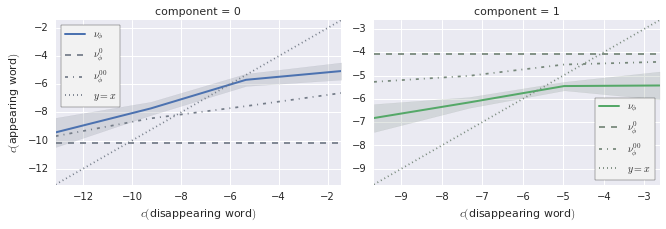

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 769 (cluster-unique) substitutions, but the PCA is in fact computed on 589 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
    * global -> sentence-relative


   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


   ** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 458 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07820939454795783

intercept                      7.375935
global_aoa                    -0.002024
global_clustering              0.306571
global_frequency               0.379842
global_letters_count          -0.011313
global_orthographic_density   -0.092282
global_synonyms_count         -0.017598
dtype: float64

Regressing global frequency with 458 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.13435825846910143

intercept                                              17.549799
global_aoa                                             -1.194802
global_clustering                                       1.235173
global_frequency                                        0.263464
global_letters_count                                   -1.043017
global_orthographic_density                             0.232688
globa

R^2 = 0.2914446420215465

intercept                                       -1.471628
rel_aoa                                          0.124194
rel_clustering                                   0.388539
rel_frequency                                    0.664531
rel_letters_count                               -0.021078
rel_orthographic_density                        -0.534296
rel_synonyms_count                              -0.003878
rel_aoa * rel_clustering                        -0.038592
rel_aoa * rel_frequency                         -0.014328
rel_aoa * rel_letters_count                     -0.017454
rel_aoa * rel_orthographic_density               0.075329
rel_aoa * rel_synonyms_count                     0.016739
rel_clustering * rel_frequency                  -0.101797
rel_clustering * rel_letters_count              -0.017175
rel_clustering * rel_orthographic_density        0.274133
rel_clustering * rel_synonyms_count             -0.202609
rel_frequency * rel_letters_count             

Regressing rel aoa with 413 measures, no interactions
           ^^^^^^^
R^2 = 0.05132981016620708

intercept                     -0.341677
global_aoa                     0.137713
global_clustering             -0.196634
global_frequency              -0.208251
global_letters_count           0.109461
global_orthographic_density    0.204156
global_synonyms_count          0.261222
dtype: float64

Regressing rel aoa with 413 measures, with interactions
           ^^^^^^^
R^2 = 0.1395728195808298

intercept                                             -9.902835
global_aoa                                             1.644102
global_clustering                                     -0.491854
global_frequency                                       0.813861
global_letters_count                                   0.483622
global_orthographic_density                           -3.073618
global_synonyms_count                                 -0.837552
global_aoa * global_clustering                         

R^2 = 0.3381960950103884

intercept                                                 64.023615
global_aoa                                                 2.021192
global_clustering                                         17.749213
global_frequency                                          -0.369577
global_letters_count                                       0.288689
global_orthographic_density                               -9.631026
global_synonyms_count                                    -33.154143
rel_aoa                                                   -0.774091
rel_clustering                                            -4.445735
rel_frequency                                              3.159118
rel_letters_count                                          4.171518
rel_orthographic_density                                   9.345945
rel_synonyms_count                                        24.070291
global_aoa * global_clustering                            -0.211196
global_aoa * global_fr

Regressing global clustering with 359 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.060393825309859706

intercept                                       -5.815892
rel_aoa                                         -0.017441
rel_clustering                                   0.099940
rel_frequency                                   -0.037383
rel_letters_count                                0.013697
rel_orthographic_density                         0.019469
rel_synonyms_count                              -0.124386
rel_aoa * rel_clustering                         0.030702
rel_aoa * rel_frequency                         -0.018300
rel_aoa * rel_letters_count                      0.007666
rel_aoa * rel_orthographic_density               0.063040
rel_aoa * rel_synonyms_count                     0.075259
rel_clustering * rel_frequency                   0.036275
rel_clustering * rel_letters_count               0.005861
rel_clustering * rel_orthographic_density       -0.080572
rel_clu

Regressing rel letters_count with 458 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.05060310570869053

intercept                     -1.072625
global_aoa                     0.044794
global_clustering             -0.482486
global_frequency              -0.103929
global_letters_count           0.182960
global_orthographic_density    0.048970
global_synonyms_count         -0.034429
dtype: float64

Regressing rel letters_count with 458 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.0993501734137947

intercept                                             -18.130451
global_aoa                                              1.109863
global_clustering                                      -3.657857
global_frequency                                        1.224752
global_letters_count                                    0.125929
global_orthographic_density                            -2.448938
global_synonyms_count                                   0.816282
global_a

R^2 = 0.25587483103509645

intercept                                                -3.868276
global_aoa                                                4.438116
global_clustering                                         3.793670
global_frequency                                          1.699256
global_letters_count                                     -1.136281
global_orthographic_density                              -1.887159
global_synonyms_count                                    -4.687693
rel_aoa                                                  -3.055215
rel_clustering                                           -8.215833
rel_frequency                                             0.369564
rel_letters_count                                         0.663834
rel_orthographic_density                                 -2.282779
rel_synonyms_count                                        2.027730
global_aoa * global_clustering                            0.343410
global_aoa * global_frequency      

Regressing global synonyms_count with 446 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07579621858165364

intercept                   0.451220
rel_aoa                     0.028833
rel_clustering             -0.024612
rel_frequency              -0.023969
rel_letters_count          -0.038700
rel_orthographic_density    0.052237
rel_synonyms_count          0.169601
dtype: float64

Regressing global synonyms_count with 446 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.11300654236219863

intercept                                        0.507656
rel_aoa                                          0.006613
rel_clustering                                  -0.095122
rel_frequency                                   -0.006256
rel_letters_count                               -0.087348
rel_orthographic_density                         0.034977
rel_synonyms_count                               0.080366
rel_aoa * rel_clustering                        -0.009129
rel

Regressing rel synonyms_count with 446 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.361660528557886

intercept                                                -1.974317
global_aoa                                                0.241436
global_clustering                                         1.254920
global_frequency                                          0.167670
global_letters_count                                      0.559755
global_orthographic_density                               2.783855
global_synonyms_count                                     3.166774
rel_aoa                                                  -0.213929
rel_clustering                                           -1.573258
rel_frequency                                            -0.545338
rel_letters_count                                        -0.835405
rel_orthographic_density                                 -2.582151
rel_synonyms_count                                       -7.374683
global_

Regressing global orthographic_density with 382 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2630541427768328

intercept                                                -8.425130
global_aoa                                               -0.567098
global_clustering                                        -0.793244
global_frequency                                          1.009044
global_letters_count                                      1.341809
global_orthographic_density                              -0.112965
global_synonyms_count                                     3.368236
rel_aoa                                                  -0.683584
rel_clustering                                            3.363308
rel_frequency                                            -0.992991
rel_letters_count                                        -1.169316
rel_orthographic_density                                 -1.827537
rel_synonyms_count                                     